In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ziads\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# ruff :noqa: E402

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as ex
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Background

## Motivation
The US Airbnb Open Data offers valuable insights into the short-term rental market. Researchers can use it to uncover trends, businesses can leverage it for competitive advantages, and individuals can benefit when planning travel. Analyzing this data contributes to a more informed and efficient marketplace.
## Problem Description
Problem: Predict Airbnb listing prices with high accuracy for informed decision making.
Importance for price regression:
- Enables accurate pricing for hosts to optimize revenue and guest satisfaction.
- Empowers guests to find cost-effective accommodation that aligns with their budget.
- Provides valuable data for platforms like Airbnb to personalize user experiences and offer targeted recommendations.
- Can inform policy decisions related to short-term rentals and market regulations.


# Dataset

In [3]:
sns.set_style("whitegrid")
%matplotlib inline


SEED : int = 31415
def set_seed(seed: int = SEED) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed()

In [4]:
df = pd.read_csv("data/AB_US_2023.csv")

C:\Users\ziads\AppData\Local\Temp\ipykernel_10940\3866743118.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/AB_US_2023.csv")


Here we are reading the first rows of the dataset.

In [5]:
df.head()

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

In [6]:
print(df.shape)
#print numercal data 
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))
# print categorical data
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))


(232147, 18)
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
11
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'city']
7


The size of the data set is 232147 rows and 18 columns with 11numerical columns and 7 categorical columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [8]:
df.describe(include="all")

id                             name       host_id  \
count   2.321470e+05                           232131  2.321470e+05   
unique           NaN                           220164           NaN   
top              NaN  Presidential Suite In A Mansion           NaN   
freq             NaN                              150           NaN   
mean    2.584580e+17                              NaN  1.582248e+08   
std     3.465985e+17                              NaN  1.587164e+08   
min     6.000000e+00                              NaN  2.300000e+01   
25%     2.638896e+07                              NaN  2.299242e+07   
50%     4.896307e+07                              NaN  1.005783e+08   
75%     6.633014e+17                              NaN  2.686930e+08   
max     8.581014e+17                              NaN  5.069384e+08   

         host_name  neighbourhood_group         neighbourhood       latitude  \
count       232134                96500                232147  232147.000000   
unique       29368                   30                  1412            NaN   
top     Blueground  City of Los Angeles  Unincorporated Areas            NaN   
freq          4305                22204                 11882            NaN   
mean           NaN                  NaN                   NaN      36.610585   
std            NaN                  NaN                   NaN       5.126523   
min            NaN                  NaN                   NaN      25.957323   
25%            NaN                  NaN                   NaN      33.976225   
50%            NaN                  NaN                   NaN      36.190556   
75%            NaN                  NaN                   NaN      40.717440   
max            NaN                  NaN                   NaN      47.734010   

            longitude        room_type          price  minimum_nights  \
count   232147.000000           232147  232147.000000   232147.000000   
unique            NaN                4            NaN             NaN   
top               NaN  Entire home/apt            NaN             NaN   
freq              NaN           169142            NaN             NaN   
mean       -98.301436              NaN     259.468001       13.495867   
std         19.706929              NaN    1024.645918       27.920631   
min       -123.089130              NaN       0.000000        1.000000   
25%       -118.315111              NaN      91.000000        2.000000   
50%        -97.727670              NaN     149.000000        3.000000   
75%        -77.026222              NaN     250.000000       30.000000   
max        -70.996000              NaN  100000.000000     1250.000000   

        number_of_reviews last_review  reviews_per_month  \
count       232147.000000      183062      183062.000000   
unique                NaN        3147                NaN   
top                   NaN  2023-03-05                NaN   
freq                  NaN        5008                NaN   
mean            40.915230         NaN           1.638348   
std             80.649152         NaN           1.910812   
min              0.000000         NaN           0.010000   
25%              1.000000         NaN           0.310000   
50%              9.000000         NaN           1.000000   
75%             43.000000         NaN           2.420000   
max           3091.000000         NaN         101.420000   

        calculated_host_listings_count  availability_365  \
count                    232147.000000     232147.000000   
unique                             NaN               NaN   
top                                NaN               NaN   
freq                               NaN               NaN   
mean                         29.879055        180.985686   
std                         106.013665        134.715299   
min                           1.000000          0.000000   
25%                           1.000000         52.000000   
50%                           2.000000        175.000000   
75%   

### Visualization
- Firstly we did some steps to prepare our dataset for visualization

1) dropped all rows with price negative or null

In [9]:
df_vis = df.drop(columns=["name", "id", "host_name", "host_id"])
# drop rows with missing price or price == 0
df_vis = df_vis.dropna(subset=["price"])
df_vis = df_vis[df_vis["price"] > 0]


2) Visualize the missing values in our dataset and we found that the columns with significant number of missing values are:
    - last reviews
    - reviews per month
    - neighbourhood_group


<Axes: >

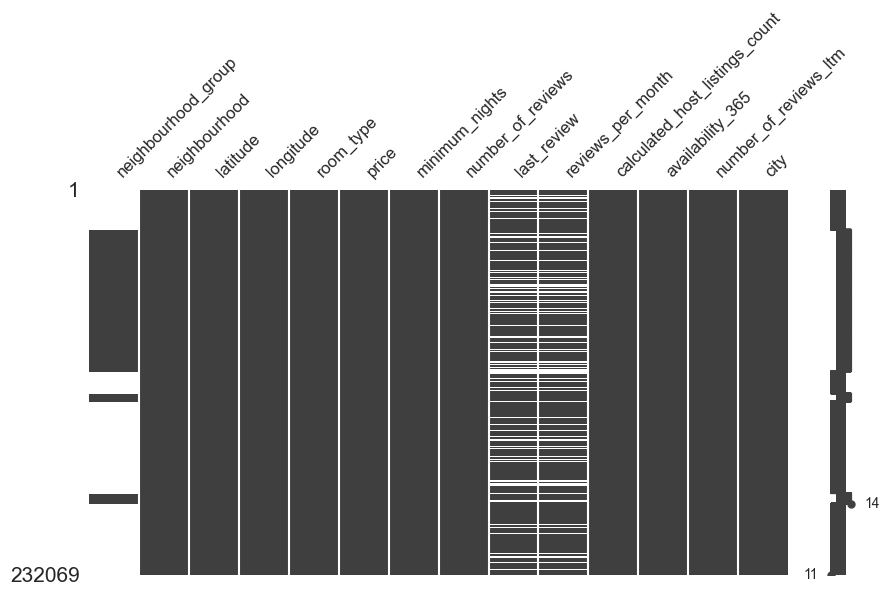

In [10]:
import missingno as msno

msno.matrix(df_vis, figsize=(10, 5), fontsize=12)

3) Scatter plot between all pairs of numeric values 

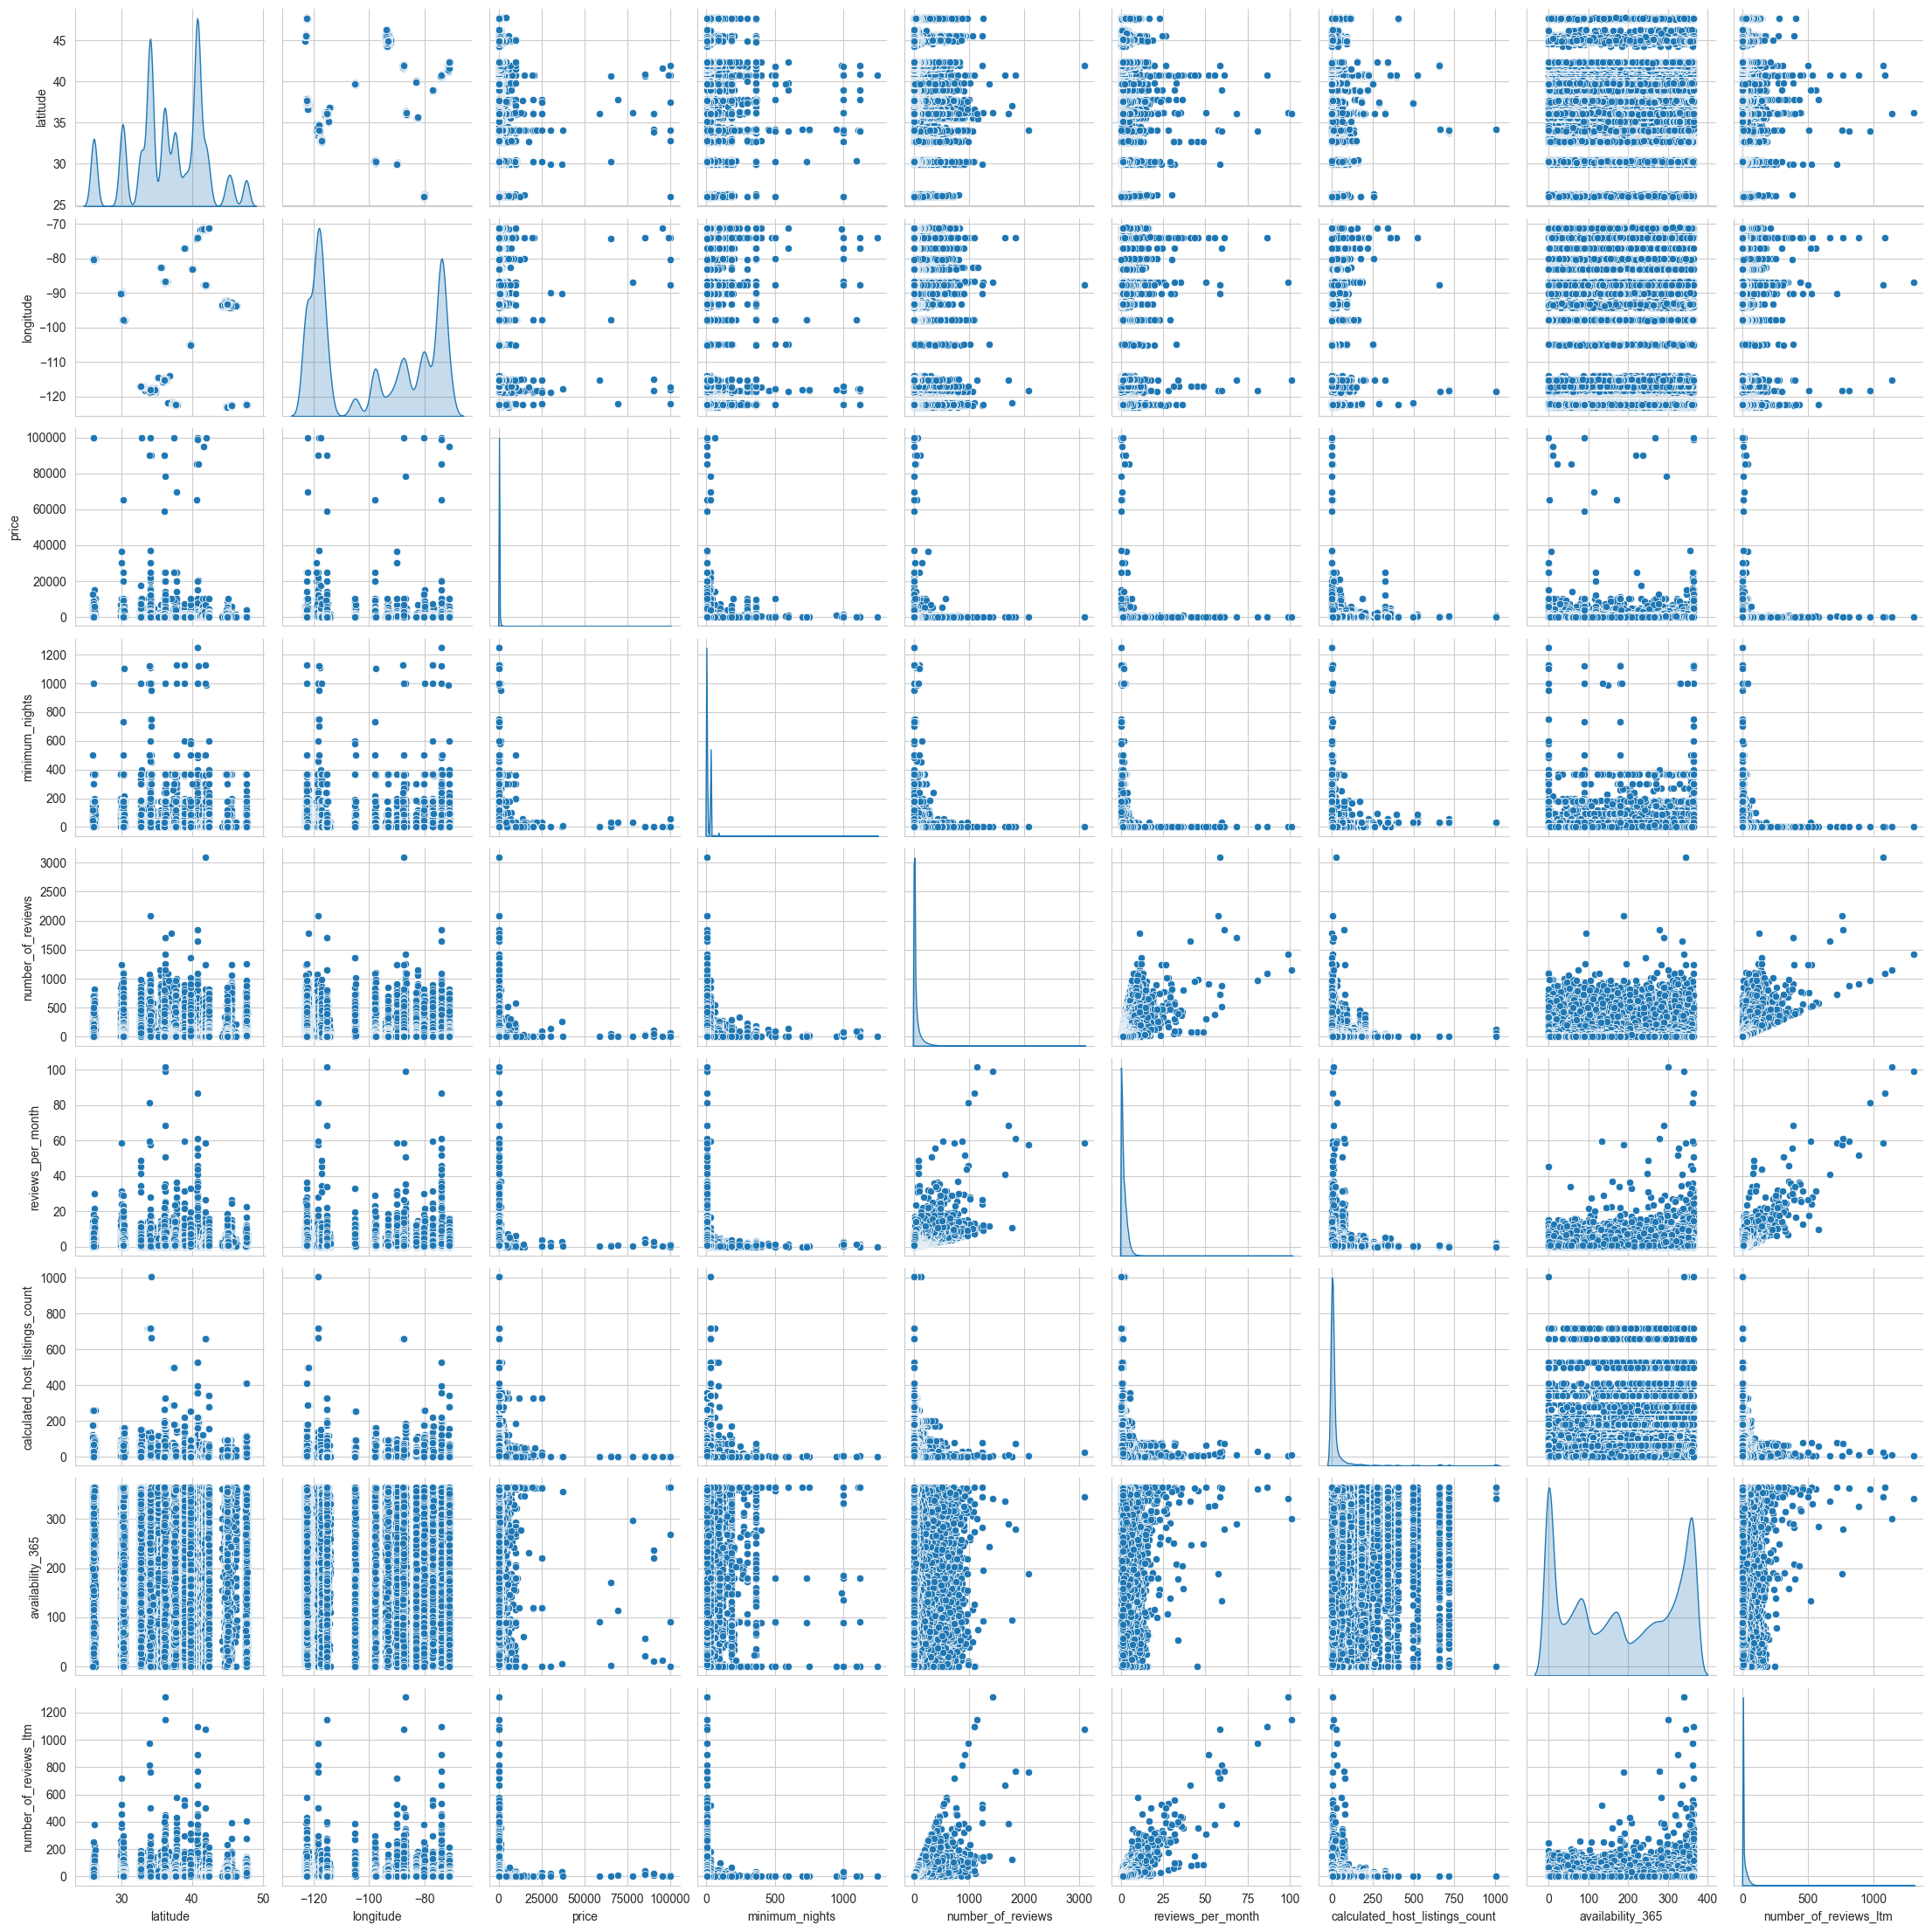

In [11]:
# plot scatter plot between all pairs of numerical columns
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
sns.pairplot(df_vis[numerical_columns], diag_kind="kde")


4) Distribution of price using histogram and violin plot


<Axes: xlabel='price', ylabel='Count'>

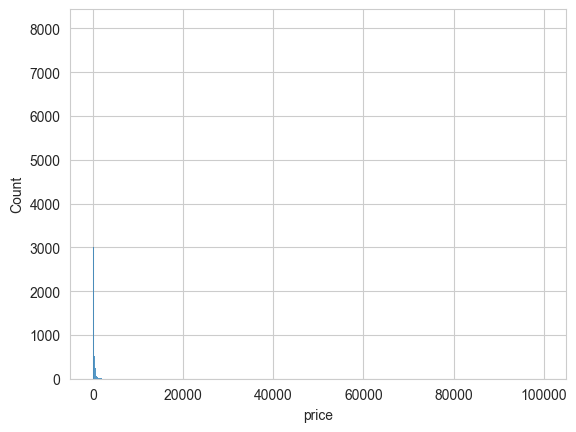

In [12]:
sns.histplot(df_vis["price"], legend=True, label="price", cbar=True)

<Axes: xlabel='price'>

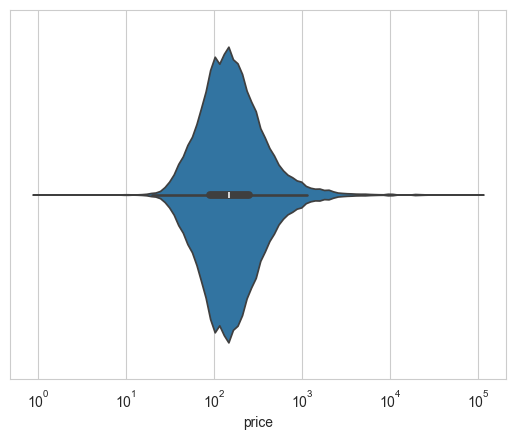

In [13]:
#plot violin for price showing the median , inter quartile range 
sns.violinplot(x="price", data=df_vis, log_scale=True)


we found that there is an outlier that makes the histogram of price large in the scale of X axis so we diceded to plot on a small range 

<Axes: xlabel='price', ylabel='Count'>

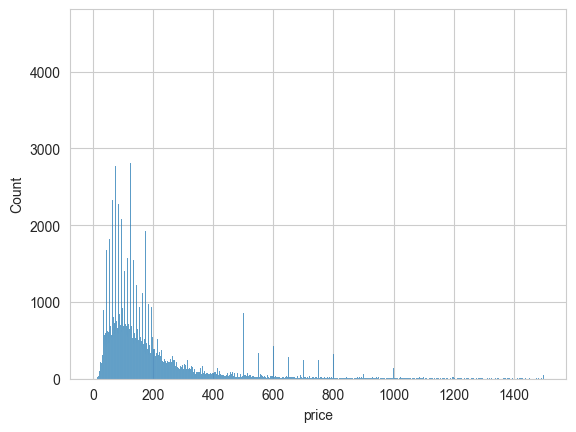

In [14]:
#plot histogram for price from range 0 to 1500 
sns.histplot(df_vis["price"], legend=True, label="price", cbar=True, bins=range(0, 1500))

5) Numerical columns distribution using violin plot

<Axes: xlabel='latitude', ylabel='Count'>

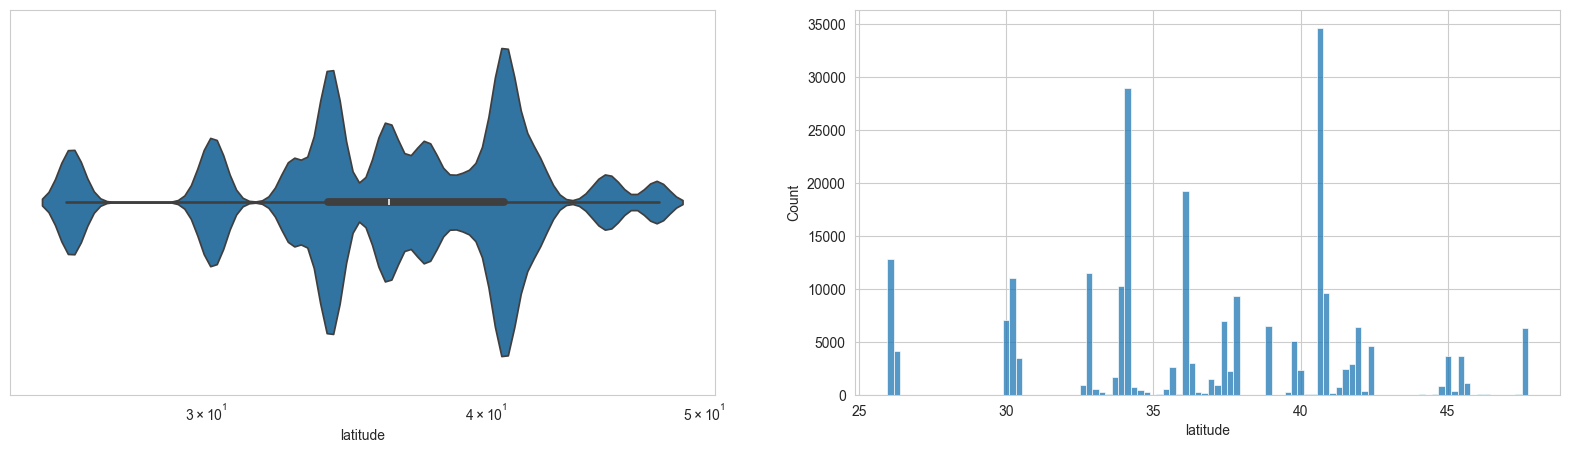

In [15]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="latitude", data=df_vis, log_scale=True, ax=ax[0])
sns.histplot(df_vis["latitude"], legend=True, label="latitude", cbar=True, ax=ax[1])


<Axes: xlabel='longitude', ylabel='Count'>

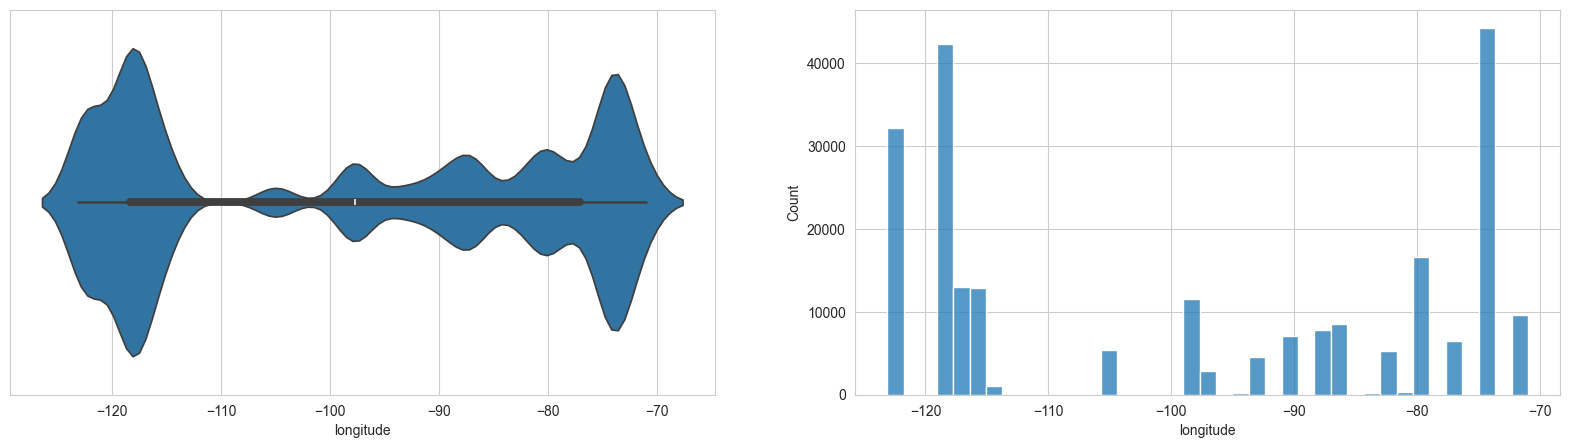

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="longitude", data=df_vis, ax=ax[0])
sns.histplot(df_vis["longitude"], legend=True, label="longitude", cbar=True, ax=ax[1])

0


<Axes: xlabel='number_of_reviews', ylabel='Count'>

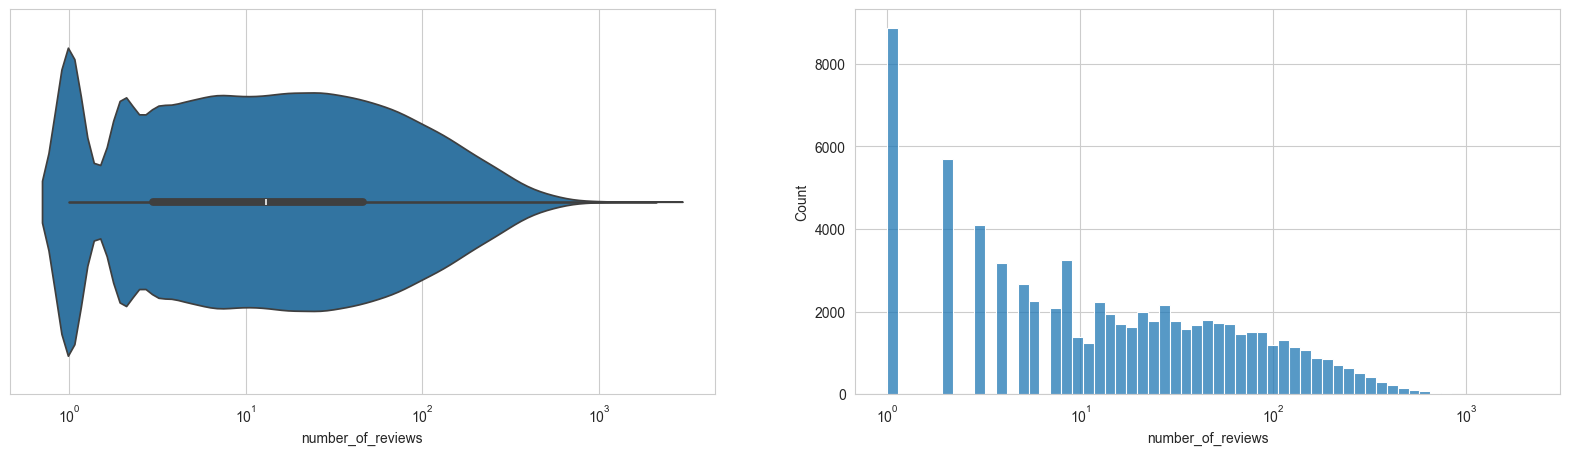

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_vis1 = df_vis.dropna()
#print number of nan values in number_of_reviews column
print(df_vis1["number_of_reviews"].isna().sum())
sns.violinplot(x="number_of_reviews", data=df_vis1, log_scale=True, ax=ax[0])
sns.histplot(df_vis1["number_of_reviews"], legend=True, label="number_of_reviews", cbar=True, ax=ax[1], log_scale=True)

<Axes: xlabel='availability_365', ylabel='Count'>

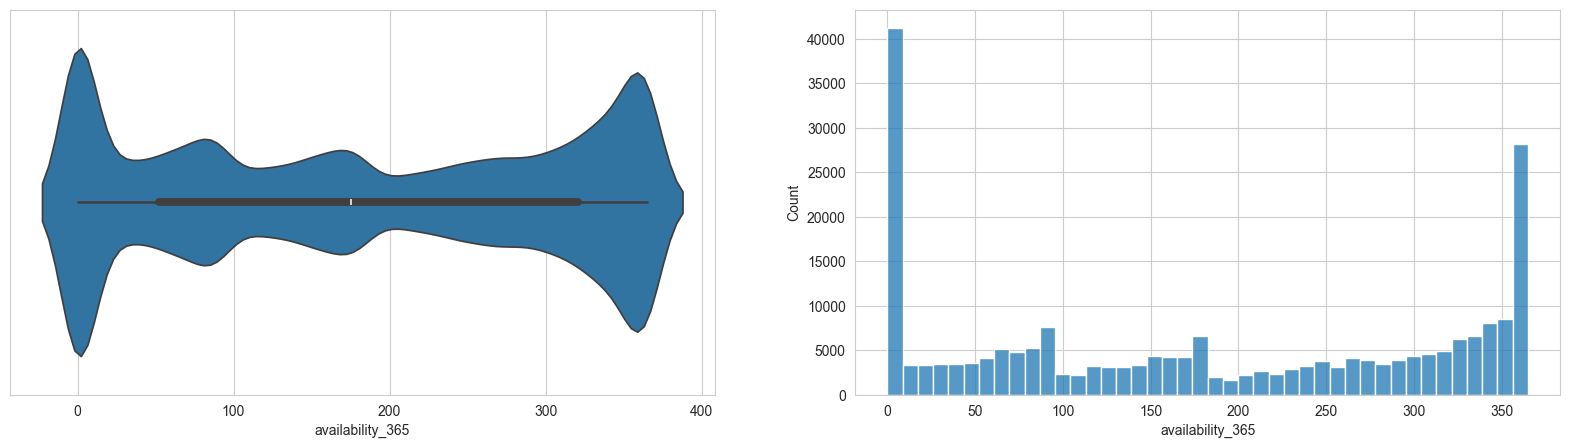

In [18]:
#plot violin and histogram for availability_365 beside eachother 
# drop nan values and infs
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="availability_365", data=df_vis, ax=ax[0])
sns.histplot(df_vis["availability_365"], legend=True, label="availability_365", cbar=True, ax=ax[1])


1250


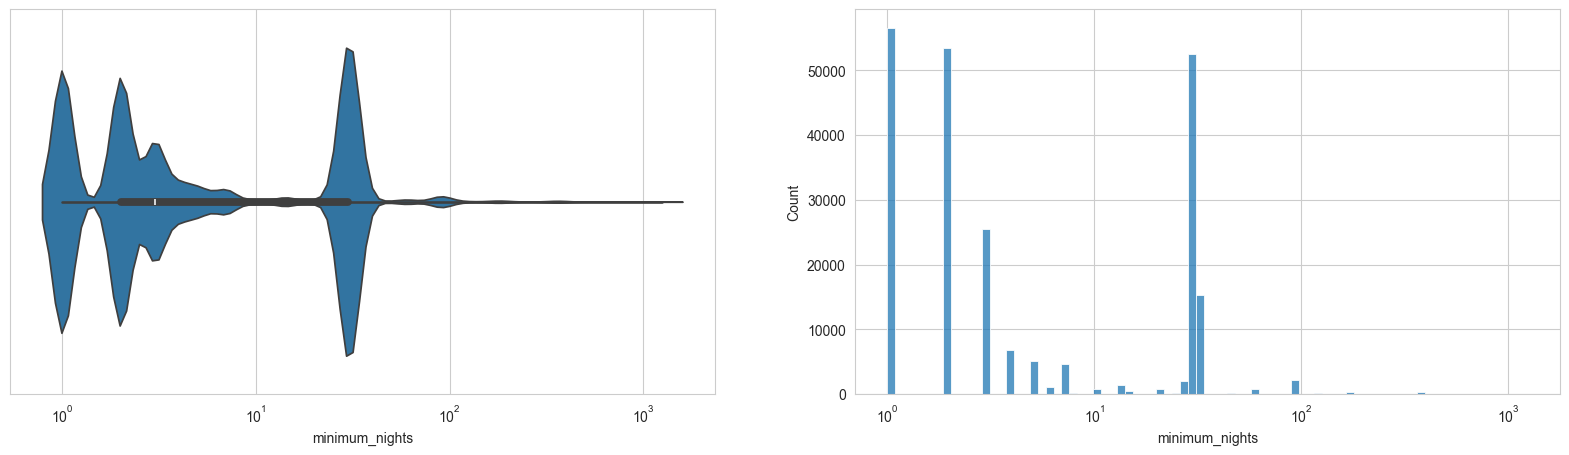

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="minimum_nights", data=df_vis, ax=ax[0], log_scale=True)
sns.histplot(df_vis["minimum_nights"], legend=True, label="minimum_nights", cbar=True, ax=ax[1],log_scale=True)

# print maximum value
print(df_vis["minimum_nights"].max())

it seems that minmum_nights column as well as price has some outliers that should be removed 

6) correlation between numerical columns

<Axes: >

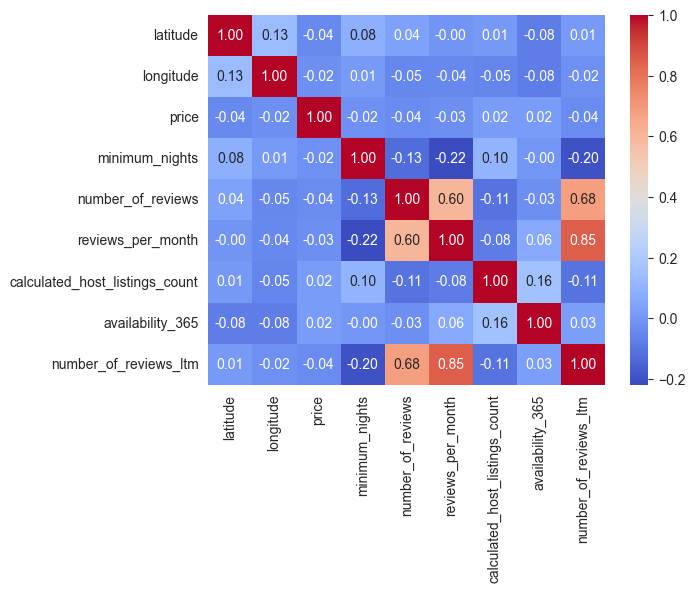

In [20]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
# plot heatmap for numerical columns
sns.heatmap(df_vis[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")

7) Analysis of categorical columns

        Room Type

<Axes: xlabel='room_type', ylabel='price'>

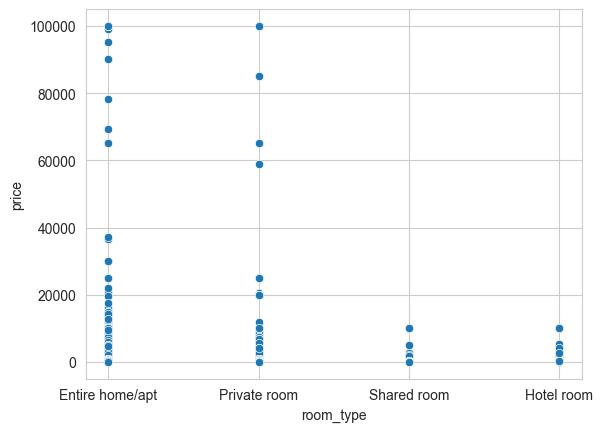

In [21]:
#plot price against room type
sns.scatterplot(x="room_type", y="price", data=df_vis)

In [22]:
info = df_vis.groupby("room_type").agg({"price": ["mean", "median", "std", "min", "max"]})
print(info)

                      price                                
                       mean median          std min     max
room_type                                                  
Entire home/apt  282.002188  177.0   870.604812   1  100000
Hotel room       803.423292  254.0  1259.686964  22   10000
Private room     193.999615   75.0  1374.945356   5  100000
Shared room       99.217047   42.0   456.720061  11   10000


Since there is alot of outliers in the price we can compare between median of the 4 categories and we could found that Hotel room tends to be more expensive than other categories

     City
 

C:\Users\ziads\AppData\Local\Temp\ipykernel_10940\3806700428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df_vis['city'],order=df_vis['city'].value_counts().index,palette='rocket')


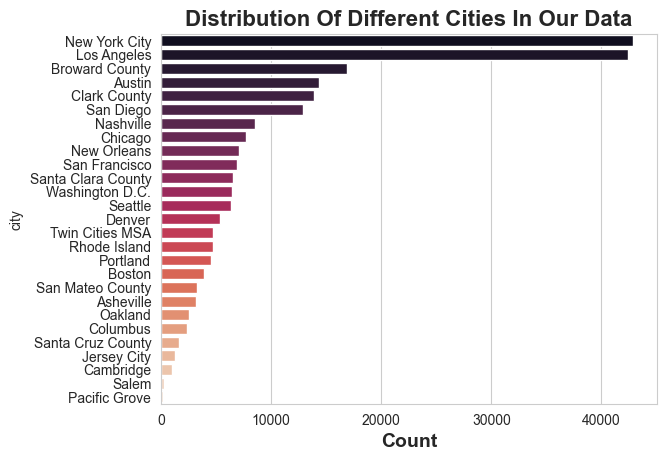

In [23]:
#Distribution of different cities 
ax = sns.countplot(y=df_vis['city'],order=df_vis['city'].value_counts().index,palette='rocket')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
#ax.set_title()
plt.show()

In [24]:
states_dic = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC', 'Santa Clara County':'CA'}

df_vis['state'] = df_vis['city'].apply(lambda x : states_dic[x])


In [25]:
## group by state and price mean
g_dat = df_vis.groupby(by='state').agg('price').mean()

#g_dat = g_dat.reset_index()
fig = ex.choropleth(g_dat,locations=g_dat.index,color='price', locationmode="USA-states", scope="usa",title='Average Listing Price At Each State', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

# Objective/Goal


Develop a robust model to predict Airbnb listing prices with high accuracy, enabling informed decision making for hosts, guests, and stakeholders.

Additionally, identify and analyze clusters of similar Airbnb listings based on key features, revealing hidden patterns and insights into the market.

# Methodology

## Data Cleaning/Preprocessing

### Handling Missing Values 
The folllowing are the missing values analysis: 

<Axes: >

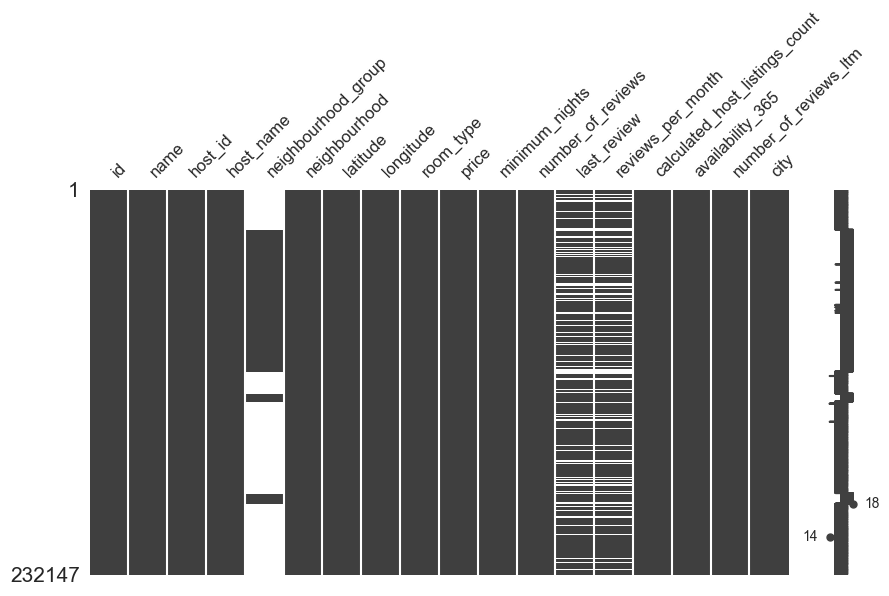

In [26]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

In [27]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0]
missing_values


name                   0.000069
host_name              0.000056
neighbourhood_group    0.584315
last_review            0.211439
reviews_per_month      0.211439
dtype: float64

In [28]:
# Completely remove columns with more than 50% missing values
df = df.drop(columns=missing_values[missing_values > 0.5].index)
print ("New shape: ", df.shape)

New shape:  (232147, 17)


In [29]:
# get number of reviews for rows with missing reviews_per_month and last_review
df[df["reviews_per_month"].isnull()]["number_of_reviews"].value_counts()

number_of_reviews
0    49085
Name: count, dtype: int64

We can see that the reason why reviews_per_month or last_review is null is because the host has never received a review. Therefore, we can replace the null values with 0 or the mode in the case of last_review.

In [30]:
df["reviews_per_month"].fillna(0, inplace=True)

There is no proper way to handle missing values of `last_review` since it's a datetime component. The number of rows that has this feature missing is around 20% of the data. Thus, it's more logical to sacrifice the feature.

In [31]:
# drop feature last_review
df = df.drop(columns=["last_review"])
print("New shape: ", df.shape)

New shape:  (232147, 16)


<Axes: >

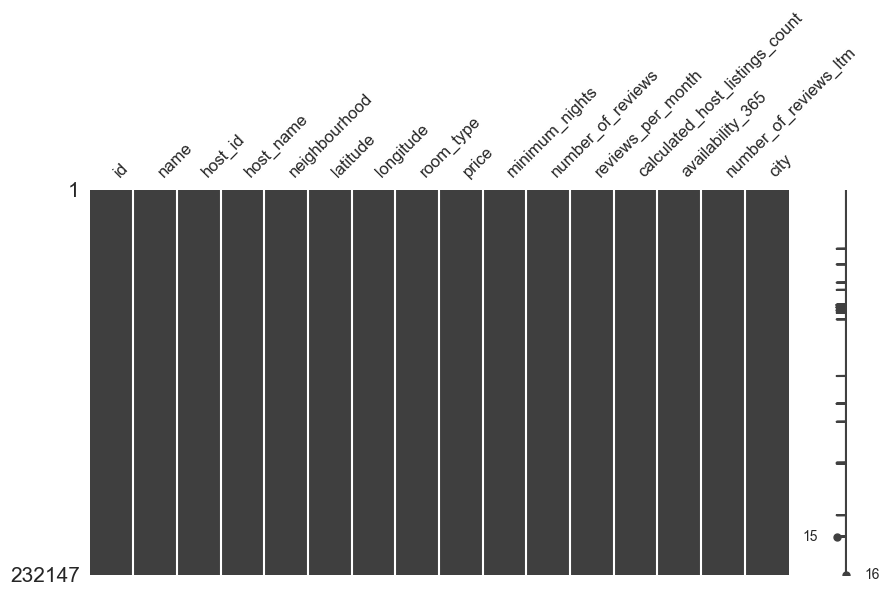

In [32]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

### Remove duplicate rows

In [33]:
# remove duplicates
cnt = df.duplicated(subset=df.columns.difference(["id"])).sum()
df = df.drop_duplicates(subset=df.columns.difference(["id"]))
print(f"Removed {cnt} duplicates.")

Removed 403 duplicates.


In [34]:
# Remove zeros from price and print their count
cnt = df[df["price"] == 0].shape[0]
df = df[df["price"] > 0]
print(f"Removed {cnt} rows with price = 0.")

Removed 78 rows with price = 0.


### Outlier Removal

From the visulizations done above, we can see that there's outliers in the following columns: 
1. price
2. minimum_nights
3. number_of_reviews

#### Price

<Axes: xlabel='price'>

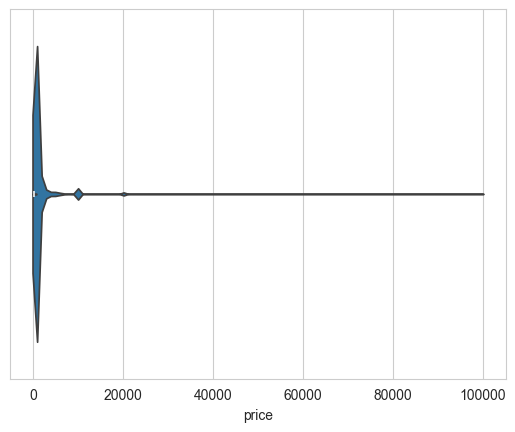

In [35]:
# remove outliers for price
# boxplot
sns.violinplot(x="price", data=df)

In [36]:
df.shape

(231666, 16)

In [37]:
# Remove outliers from price using IQR on log
# calculate IQR
q25, q75 = np.percentile(np.log(df["price"]), 25), np.percentile(np.log(df["price"]), 75)
iqr = q75 - q25
print("Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f" % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("Cut Off: %.3f" % cut_off)

# identify outliers
outliers = [x for x in np.log(df["price"]) if x < lower or x > upper]
print("Identified outliers: %d" % len(outliers))

# remove outliers
df = df[(np.log(df["price"]) > lower) & (np.log(df["price"]) < upper)]

df.shape

Percentiles: 25th=4.511, 75th=5.521, IQR=1.011
Cut Off: 1.516
Identified outliers: 5055


(226611, 16)

<Axes: xlabel='price'>

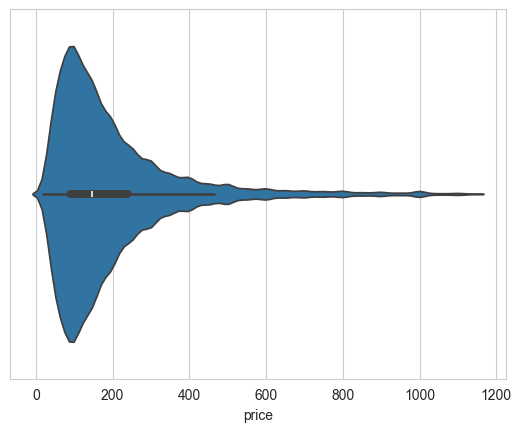

In [38]:
# boxplot
sns.violinplot(x=df["price"])

#### Number of Reviews


<Axes: xlabel='number_of_reviews'>

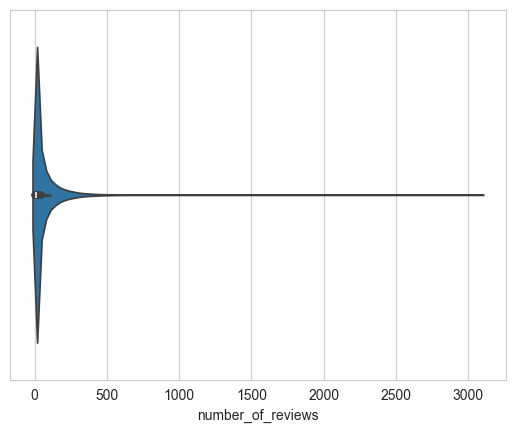

In [39]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])

IQR removal will remove alot of rows and we think that number of reviews is important feature and the outliers are not wrong values so we will only the extreme ones.

In [40]:
# Count and remove all rows with number_of_reviews > 500
print("Number of rows removed with number_of_reviews > 500: ", df[df["number_of_reviews"] > 500].shape[0])
df = df[df["number_of_reviews"] <= 500]

Number of rows removed with number_of_reviews > 500:  1017


<Axes: xlabel='number_of_reviews'>

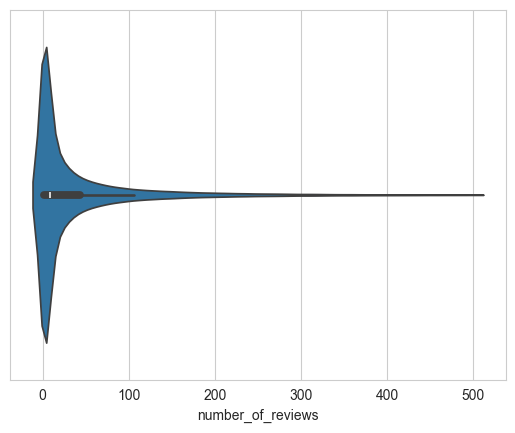

In [41]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


#### Minimum Nights

<Axes: xlabel='minimum_nights'>

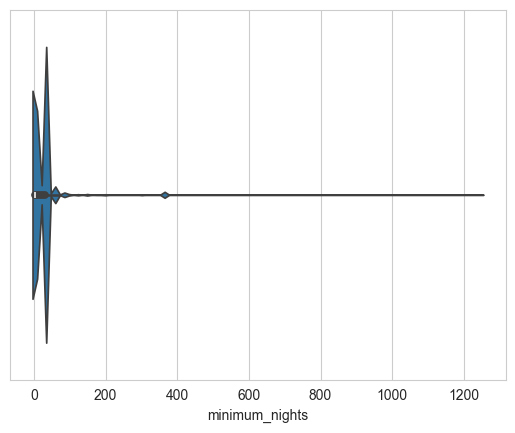

In [42]:
sns.violinplot(x=df["minimum_nights"])

In [43]:
# use interquartile range to remove outliers
q1 = df["minimum_nights"].quantile(0.25)
q3 = df["minimum_nights"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Bounds for removing outliers of minimum_nights: ", lower_bound, upper_bound)

# print number of outliers
print("Number of outliers: ", df[(df["minimum_nights"] < lower_bound) | (df["minimum_nights"] > upper_bound)].shape[0])

# remove outliers
df = df[(df["minimum_nights"] > lower_bound) & (df["minimum_nights"] < upper_bound)]


Bounds for removing outliers of minimum_nights:  -40.0 72.0
Number of outliers:  3588


<Axes: xlabel='minimum_nights'>

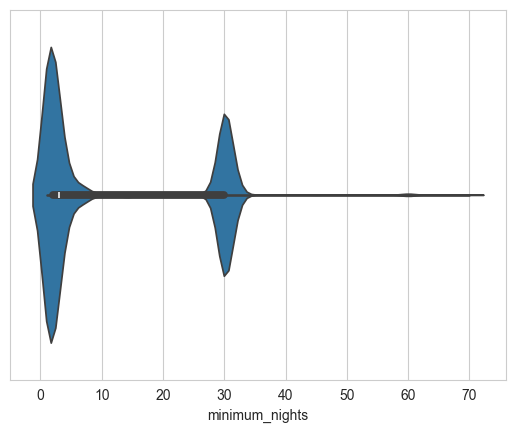

In [44]:
# violinplot
sns.violinplot(x=df["minimum_nights"])

## Feature Extraction and Selection

### Remove Unnecessary Columns
- host_name: An alomst unqiue column showing the name of the host. Unrelated to the regression as there is another column called `calculated_host_listings_count` that shows how many listings this host has done.
- host_id: A unique numbering for the host done by the original database and unrelated to the prediction.
- id: A unique numbering done by the original database and unrelated to the prediction.
- name: A description for the listings. Analyzing it would require more deep learning methods.

In [45]:
## remove unnecessary columns
unnecessary_columns = [
    "host_name",
    "host_id",
    "id",
    "name"
]

df = df.drop(columns=unnecessary_columns)
print("New shape: ", df.shape)

New shape:  (222006, 12)


### Correlation Analysis

In [46]:
## get numerical columns 
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
## corr between numerical columns except price
corr = df[numerical_columns].corr()
## plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

we can see that reviews per month and  reviews ltm is highly correlated with number of reviews so we will drop them

In [47]:
## drop reviews ltm
df = df.drop(columns=["number_of_reviews_ltm"])
## drop number of reviews
df = df.drop(columns=["reviews_per_month"])

print("New shape: ", df.shape)

New shape:  (222006, 10)


<Axes: >

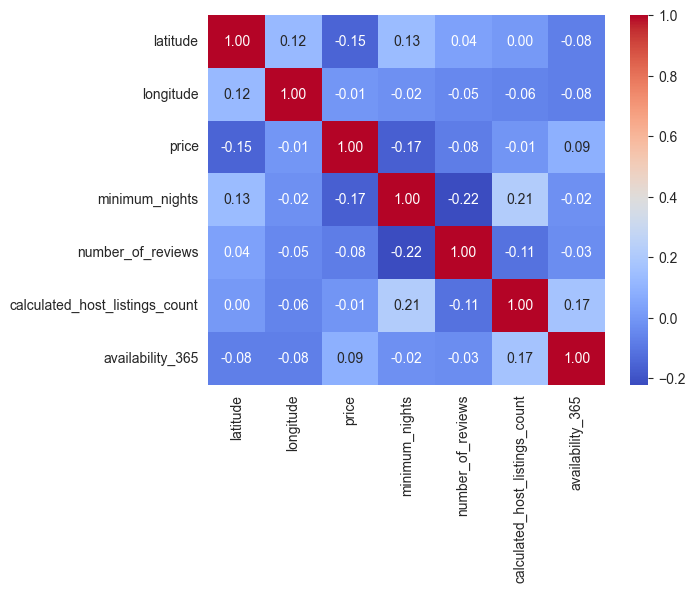

In [48]:
## get numerical columns 
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
## corr between numerical columns except price
corr = df[numerical_columns].corr()
## plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Encoding

We decided to drop neighbourhood and city column because it has a lot of classes and will result to a lot of columns after one hot encoding. which will be computationally heave, we have already longtitude and latitude so we will not lose a lot of information.

In [49]:
# Drop neighbourhood column
df = df.drop(columns=["neighbourhood"])
df = df.drop(columns=["city"])

In [50]:
# Print categorical columns
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_columns)

['room_type']


In [51]:
# Do one-hot encoding for categorical columns
## drop city column
df = pd.get_dummies(df, columns=categorical_columns)
print("New shape: ", df.shape)

New shape:  (222006, 11)


In [52]:
df.describe()

latitude      longitude          price  minimum_nights  \
count  222006.000000  222006.000000  222006.000000   222006.000000   
mean       36.615629     -98.311188     197.749921       11.378796   
std         5.137053      19.683100     168.379250       13.390738   
min        25.957323    -123.089130      20.000000        1.000000   
25%        33.973823    -118.312910      90.000000        2.000000   
50%        36.195590     -97.725300     148.000000        3.000000   
75%        40.717047     -77.029595     243.000000       30.000000   
max        47.734010     -70.996000    1138.000000       70.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count      222006.000000                   222006.000000     222006.000000  
mean           39.390345                       28.961397        180.290416  
std            69.994305                      106.161551        134.350862  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000         52.000000  
50%             9.000000                        2.000000        174.000000  
75%            44.000000                       10.000000        320.000000  
max           500.000000                     1003.000000        365.000000

### PCA Analysis

In [53]:
## create pca with explained variance bar graph and data projected on the chosen PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=3)

X = df.drop(columns=["price"])
y = df["price"]
## normalize X with min max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


pca.fit(X)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())
 #plot bar graph
plt.bar(range(3),pca.explained_variance_ratio_)

[0.47711532 0.18870014 0.15986512]
0.8256805813906598


<BarContainer object of 3 artists>

with 3 components we reached an explained variance of around 0.82

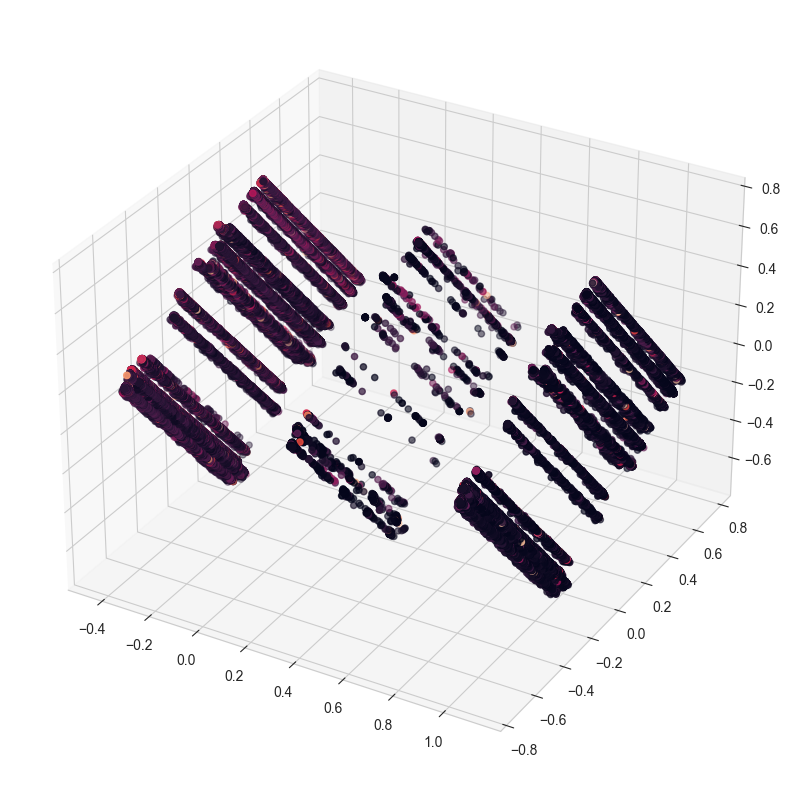

In [54]:
## plot data 3d projected on the chosen pca
X_pca = pca.transform(X)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y)
plt.show()

### Cross Validation Prep

In [55]:
X, y = df.drop(columns=["price"]), df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

### Model Training & Evaluation

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import metrics

def print_evaluation(true, pred):
    print('MSE: ', mse(true, pred))
    print('RMSE: ', np.sqrt(mse(true, pred)))
    print('MAE: ', metrics.mean_absolute_error(true, pred))

def plot_actual_vs_predicted(true, pred):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(true, label='Actual')
    sns.kdeplot(pred, label='Predicted')
    plt.legend()
    plt.show()

def plot_residuals(true, pred):
    ## create data frame of true and predicted values

    plt.figure(figsize=(10, 5))
    plt.title('Residuals')
    ## plot residuals vs predicted values
    sns.scatterplot(x=pred, y=true-pred)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    ## horizontal line at y = 0
    plt.axhline(y=0, color='red')

    plt.show()

## function to plot regression boundary along original points
def plot_regression_boundary(true_values, predicted_values):
    # Calculate residuals
    residuals = true_values - predicted_values
    
    # Create a scatter plot of true values and predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(predicted_values, true_values, c='blue', label='Original Points')

    # Plot the regression line
    sns.regplot(x=predicted_values, y=true_values, scatter=False, color='red', label='Regression Line')

   

    # Set plot labels and title
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('Regression Boundary with Residuals')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

#### Random Forest

MSE:  22629.161077659326
RMSE:  150.42992081916194
MAE:  96.55464599660804


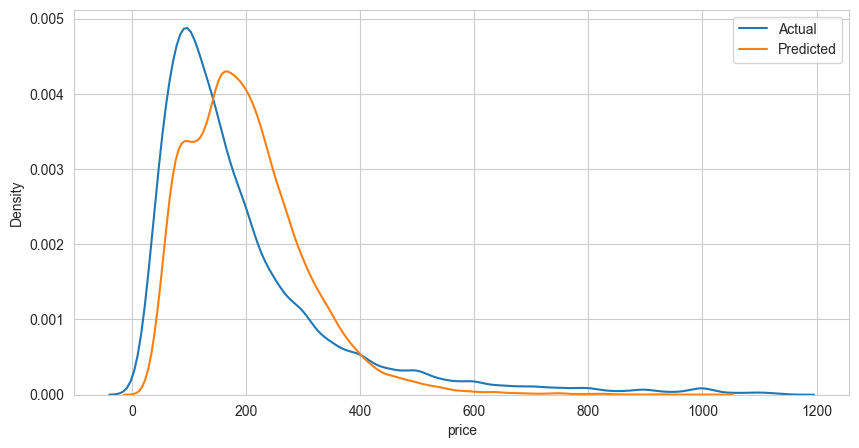

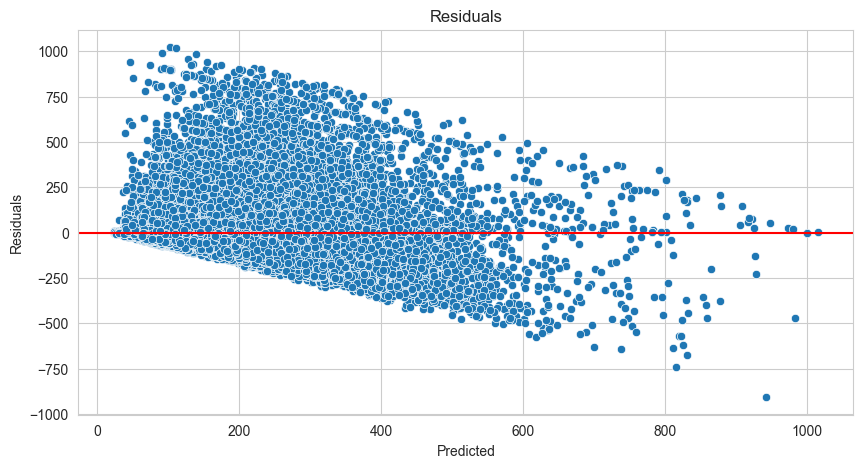

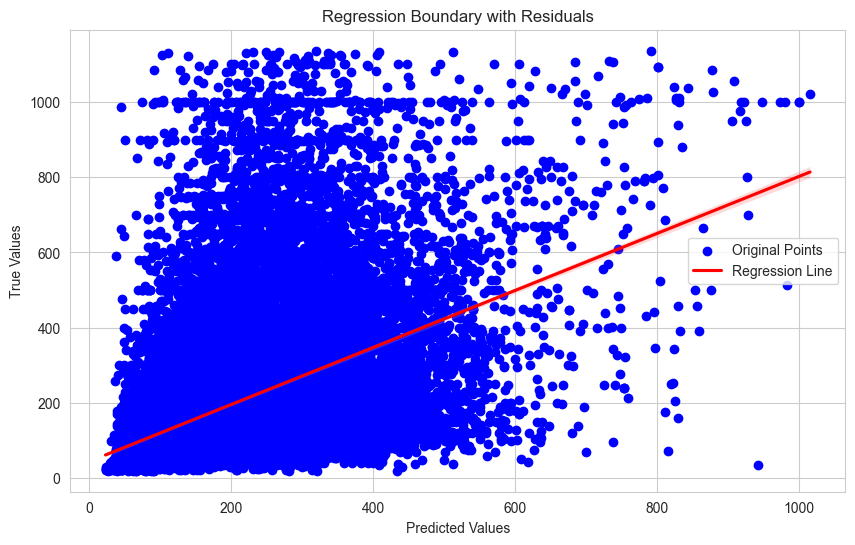

In [57]:
# Random Forst With PCA
from sklearn.ensemble import RandomForestRegressor 

pipeline = Pipeline(
    [
        ("scalerr", MinMaxScaler()),
        ("pca", PCA(n_components=3)),
        ("rf", RandomForestRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)
#plot_regression_boundary(X_train.values, y_train.values, pipeline)

MSE:  16814.325893319237
RMSE:  129.67006552523694
MAE:  79.46088429146444


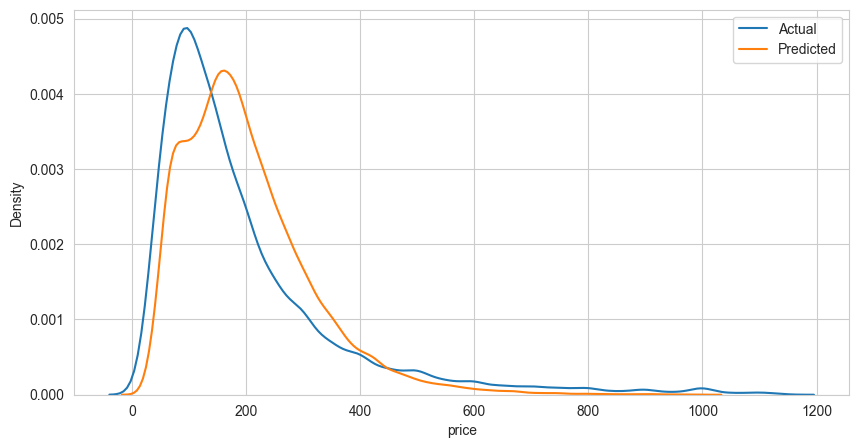

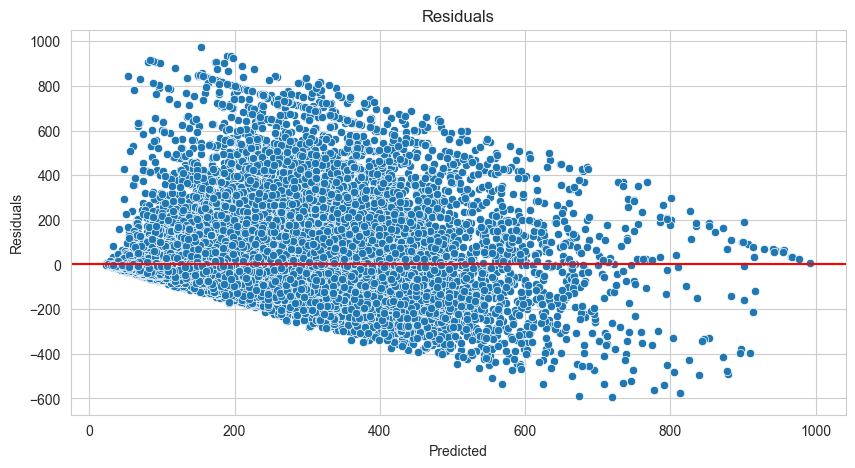

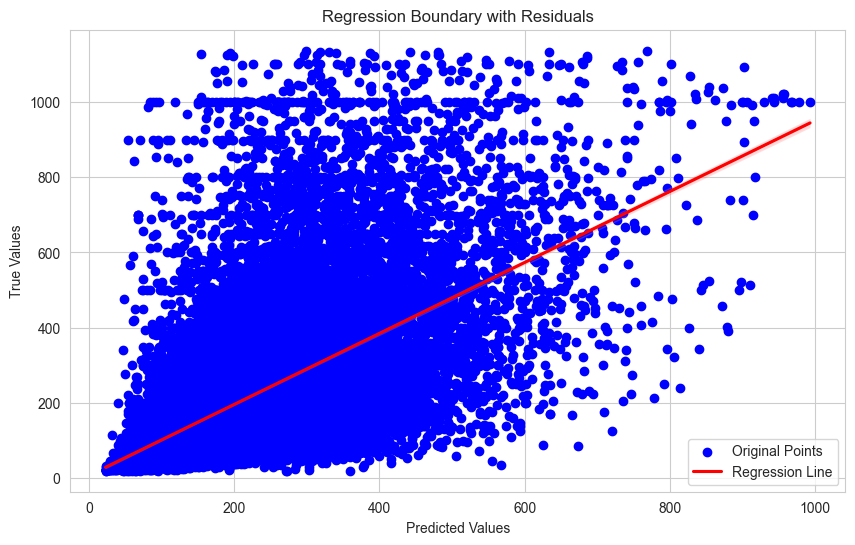

In [58]:
# Random Forst Without PCA
from sklearn.ensemble import RandomForestRegressor 

pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rf", RandomForestRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
## scale y test and ypred using min max scaler


print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

Random Forest performs better without PCA and that is because it is in general a good model with high dinemsionality data.

#### K Nearest Neighbour

MSE:  24370.12219900005
RMSE:  156.10932771298468
MAE:  100.40672492230078


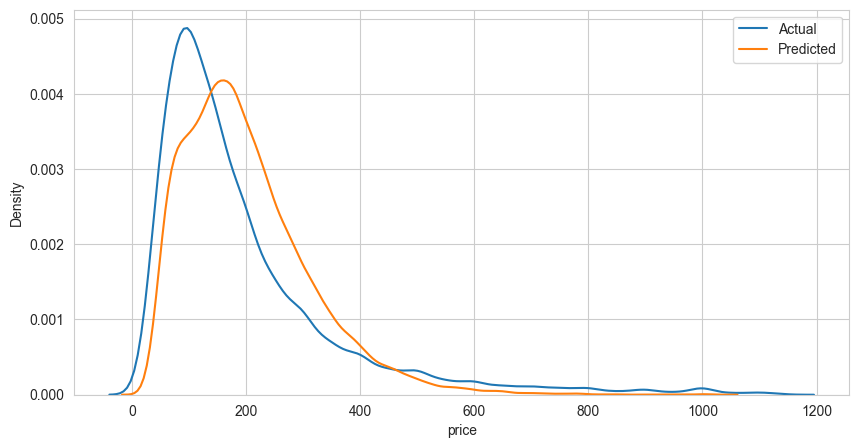

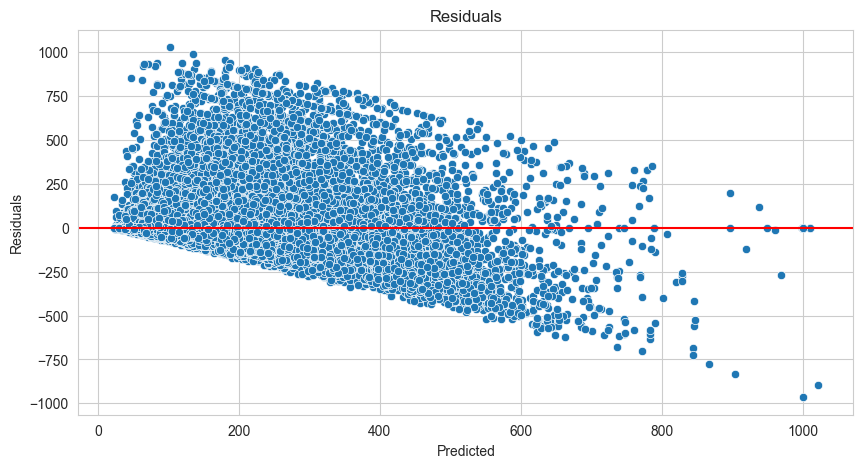

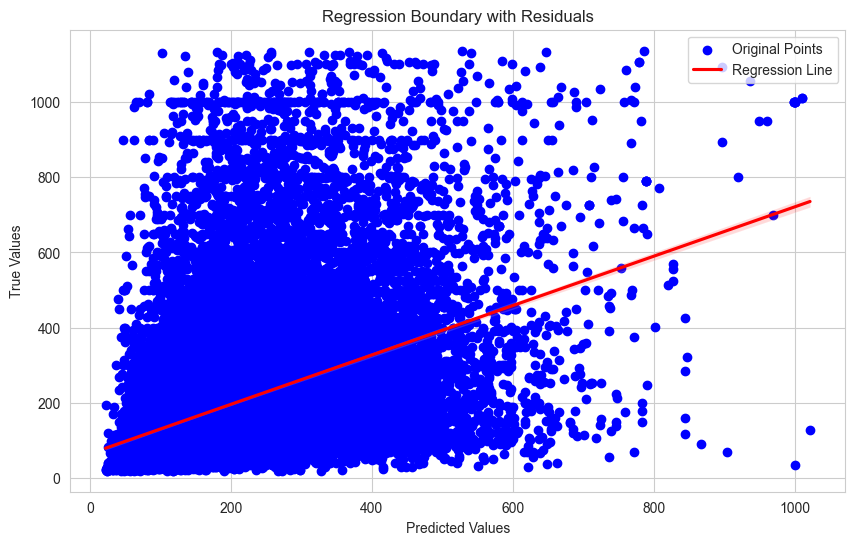

In [59]:
# Using KNN with PCA 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3)),
        ("knn", KNeighborsRegressor())
    ]
)



pipeline.fit(X_train, y_train)


# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

MSE:  22441.45785415071
RMSE:  149.80473241573748
MAE:  93.91472906625829


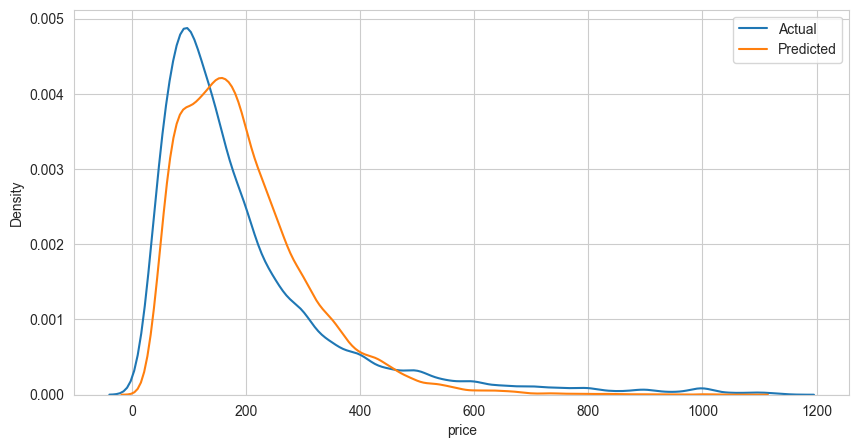

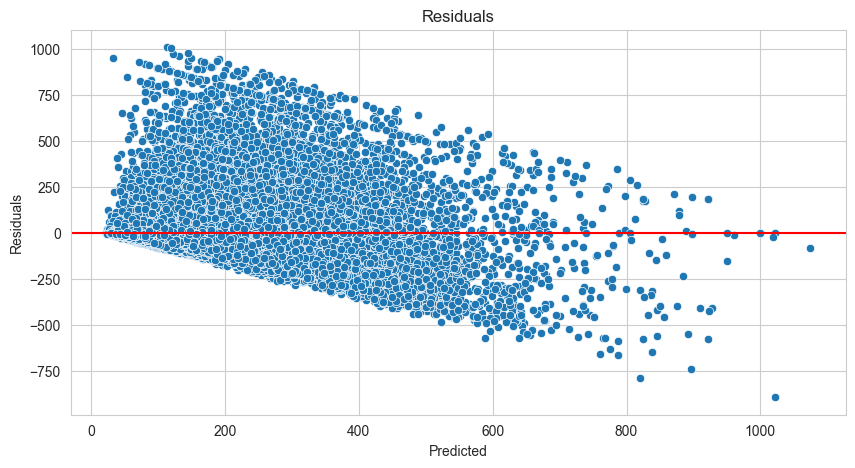

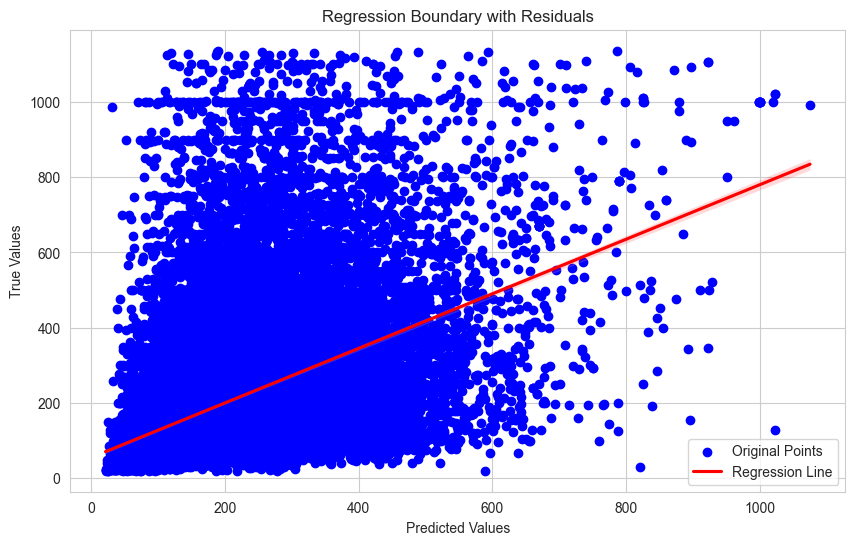

In [60]:
# Using KNN without PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsRegressor())
    ]
)



pipeline.fit(X_train, y_train)


# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

#### XGBoost

MSE:  22682.487317929277
RMSE:  150.6070626429228
MAE:  98.17350133331685


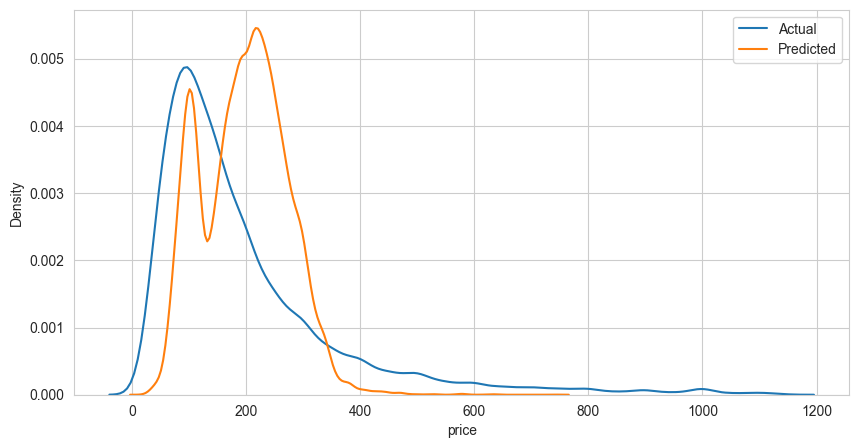

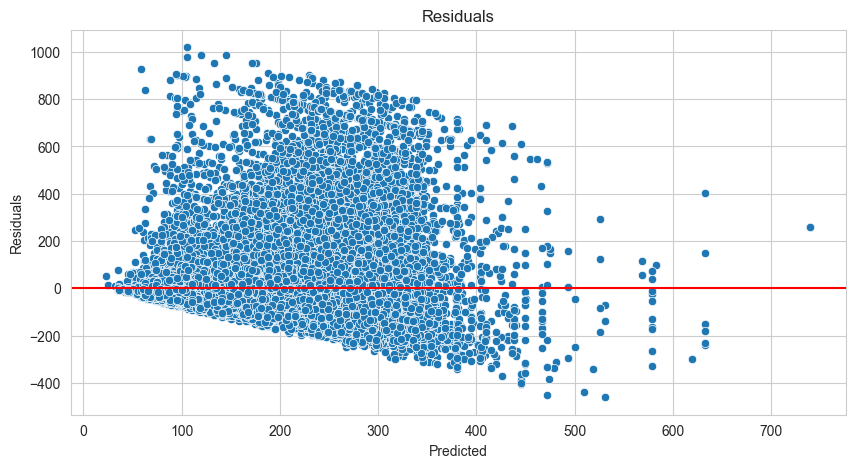

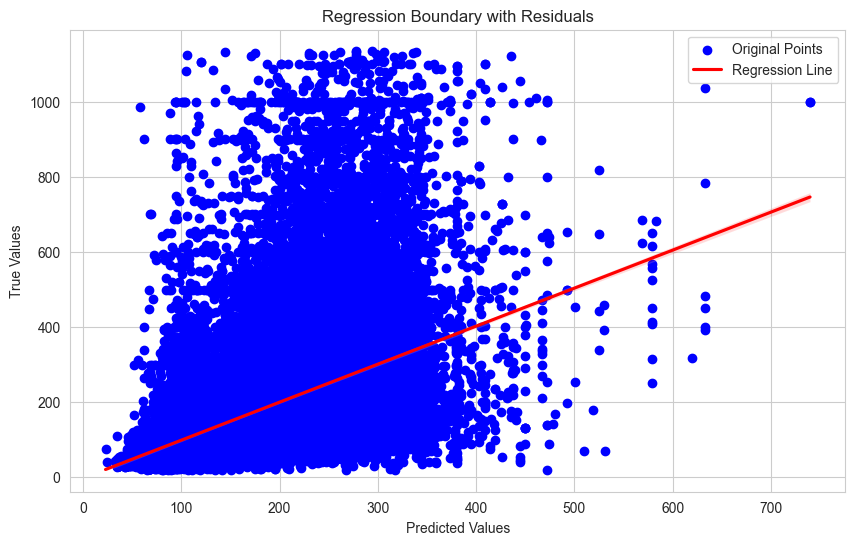

In [61]:
#With PCA
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3)),
        ("xgb", xgb.XGBRegressor())
    ]
)


pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

MSE:  17441.37644590849
RMSE:  132.06580346898468
MAE:  82.96355911909355


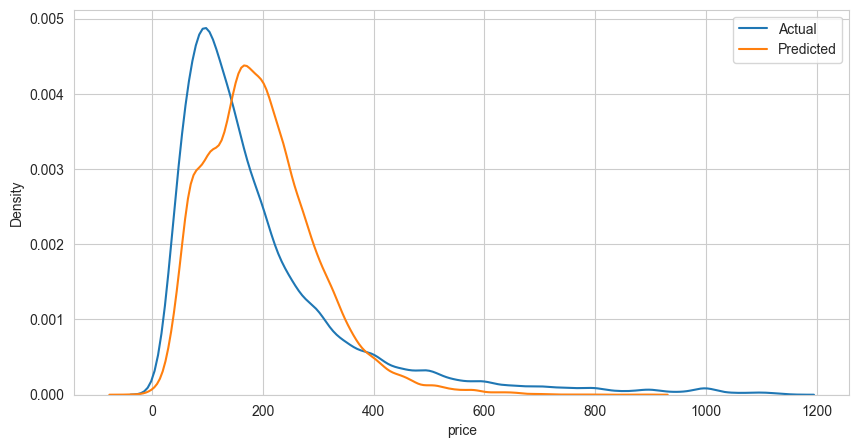

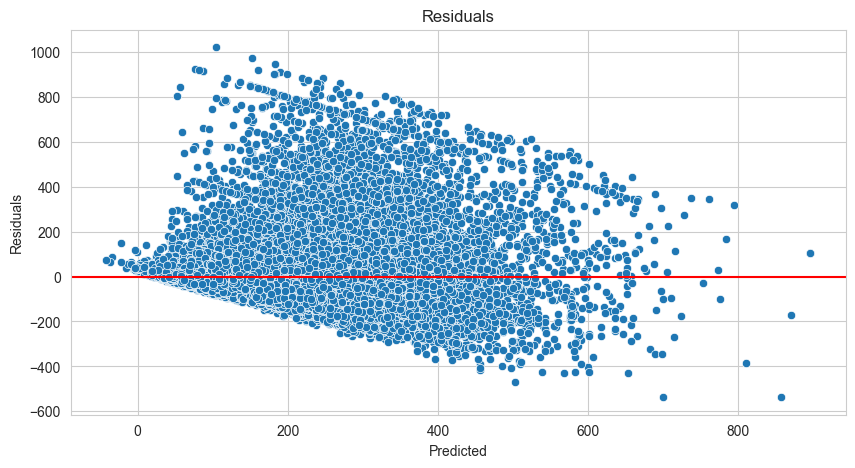

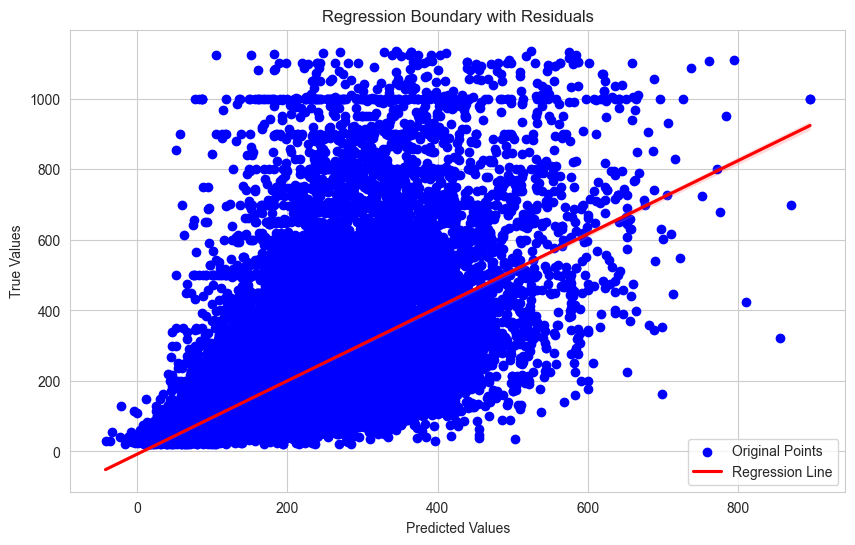

In [62]:
## without PCA
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("xgb", xgb.XGBRegressor())
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

#### Linear Regression

MSE:  25334.399797206097
RMSE:  159.16783530979524
MAE:  106.13067023068466


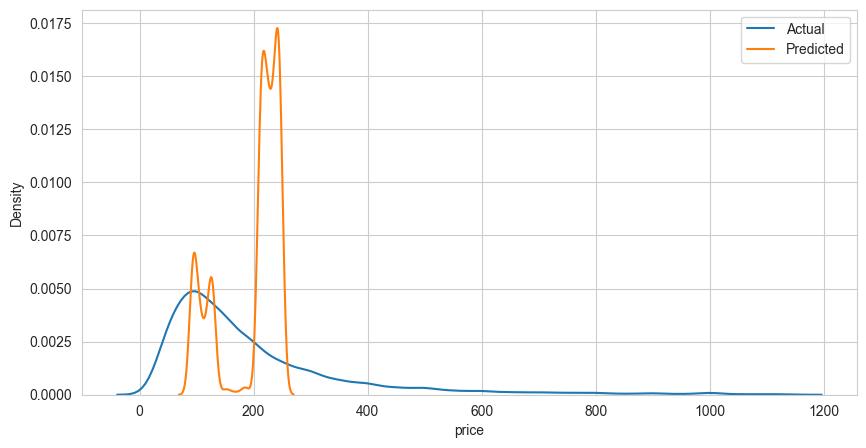

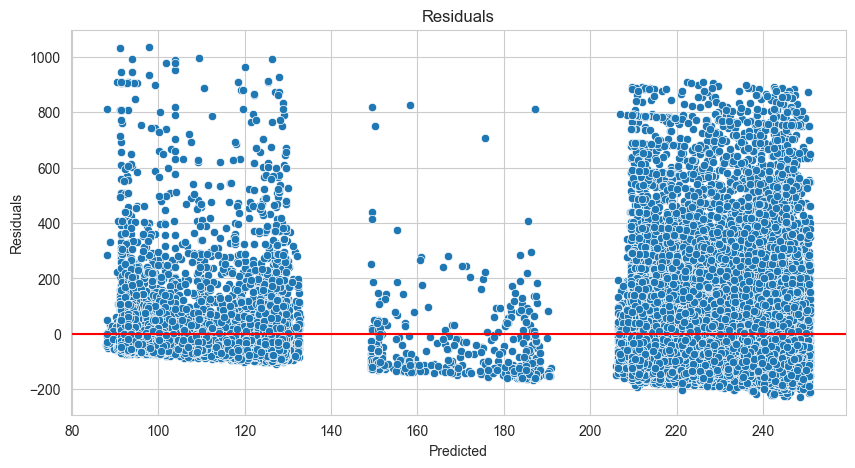

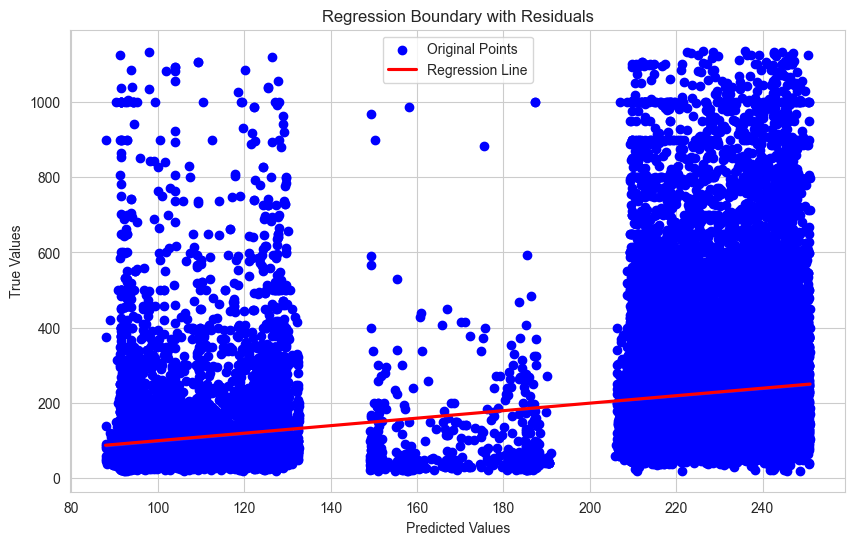

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline(
    [
        
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3)),
        ("linear regression", LinearRegression())
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

MSE:  23904.85257139318
RMSE:  154.61194187834644
MAE:  102.19397774875006


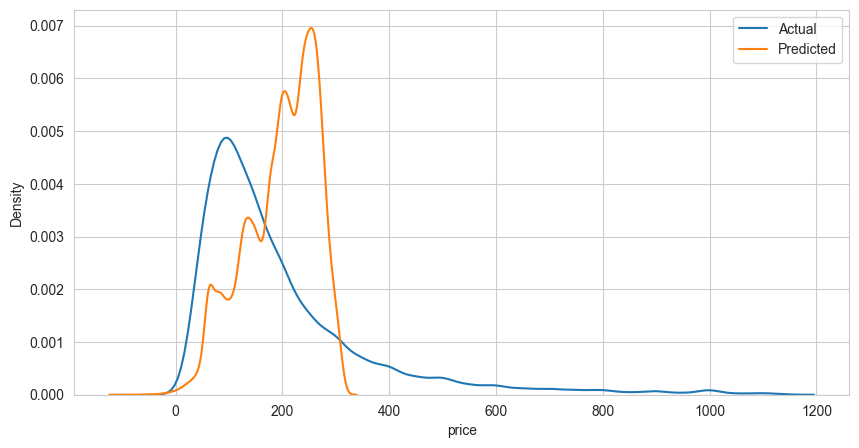

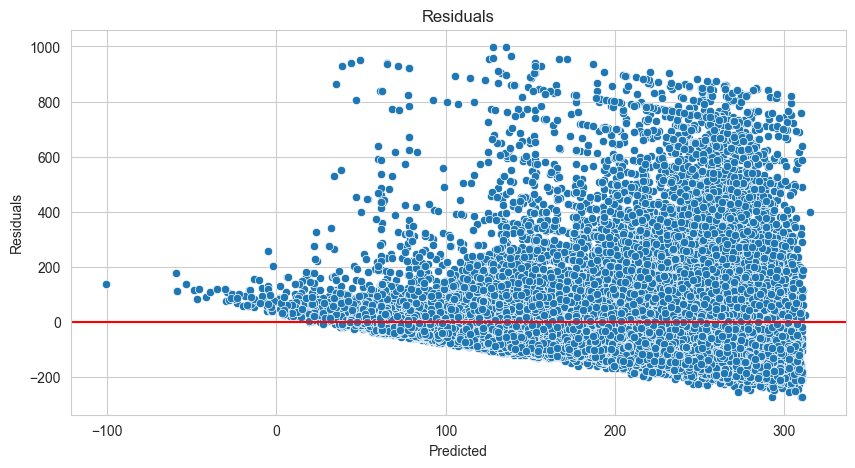

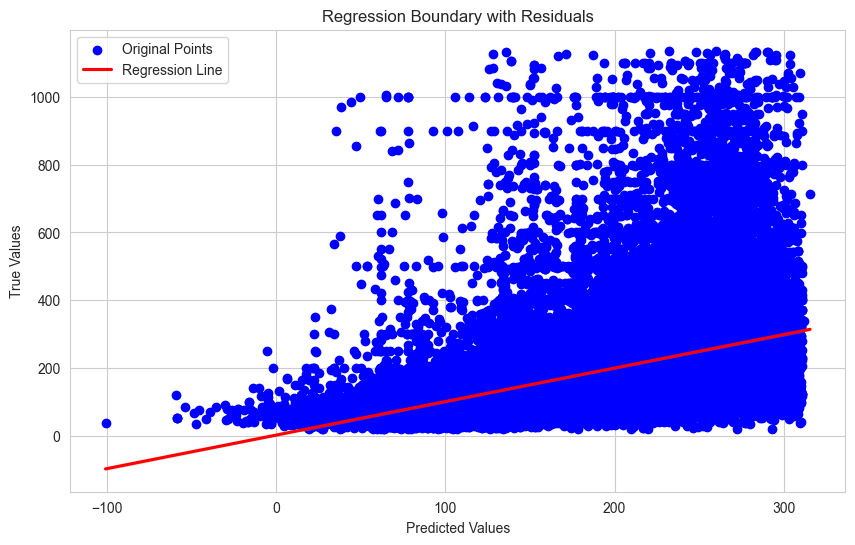

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("linear regression", LinearRegression())
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_regression_boundary(y_test.values, y_pred)

# Clustering

In [65]:
# select all numerical features for clustering
cluster_df = df[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews" ,"calculated_host_listings_count", "availability_365"]]

In [66]:
# Scale the data
scaler = StandardScaler()
cluster_df = pd.DataFrame(scaler.fit_transform(cluster_df), columns=cluster_df.columns)
scaled_df = cluster_df

# sample scaled_df randomly
scaled_df = scaled_df.sample(frac=0.01, replace=False, random_state=SEED)

#### K-Means Clustering

Text(0, 0.5, 'WCSS')

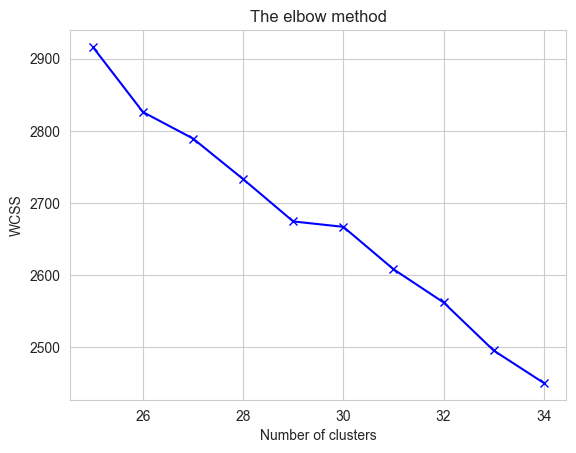

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# test kmeans using elbow method
wcss = []

for i in range(25, 35):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(25, 35), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares


processing: i=10
processing: i=20
processing: i=30
processing: i=40
processing: i=50
processing: i=60
processing: i=70
processing: i=80
processing: i=90


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

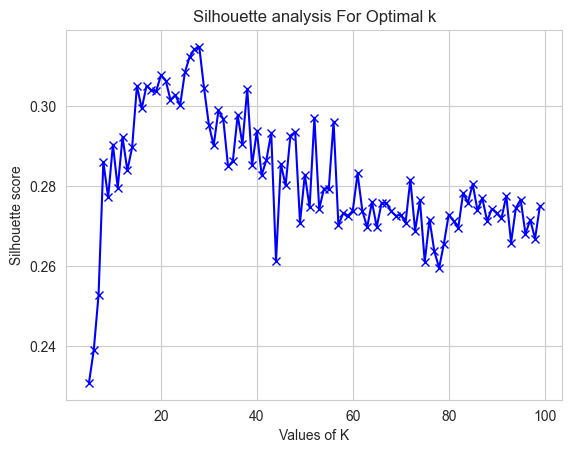

In [68]:
avg_silhouette = []

for i in range(5,100):
    if(i % 10 == 0): 
        print(f"processing: {i=}")
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(range(5, 100),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [69]:
# get the index with the max value in avg_silhouette
max_index = avg_silhouette.index(max(avg_silhouette))
print(f"Max silhouette score: {max(avg_silhouette)}")


Max silhouette score: 0.31486195366710473


After analysing both elbow and silhouette we found that the number of clusters was best to be 29 because it had an elbow and the silhouette score is very closet to max.

C:\Users\ziads\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



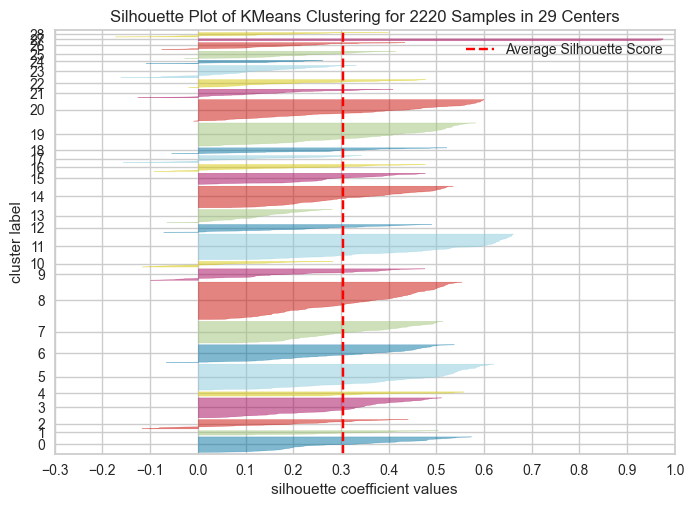

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2220 Samples in 29 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
from yellowbrick.cluster import SilhouetteVisualizer

km = KMeans(n_clusters=29, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit_predict(scaled_df)
clusters = km.labels_

# calculate silhouette score on a sample of 10000 rows


visualizer = SilhouetteVisualizer(km, colors='yellowbrick') #, ax=ax[q-1][mod])
visualizer.fit(scaled_df)
visualizer.show()

In [71]:
## print davis bouldin score
from sklearn.metrics import davies_bouldin_score
print("Davis Bouldin",davies_bouldin_score(scaled_df, clusters))

Davis Bouldin 1.1768413609321888


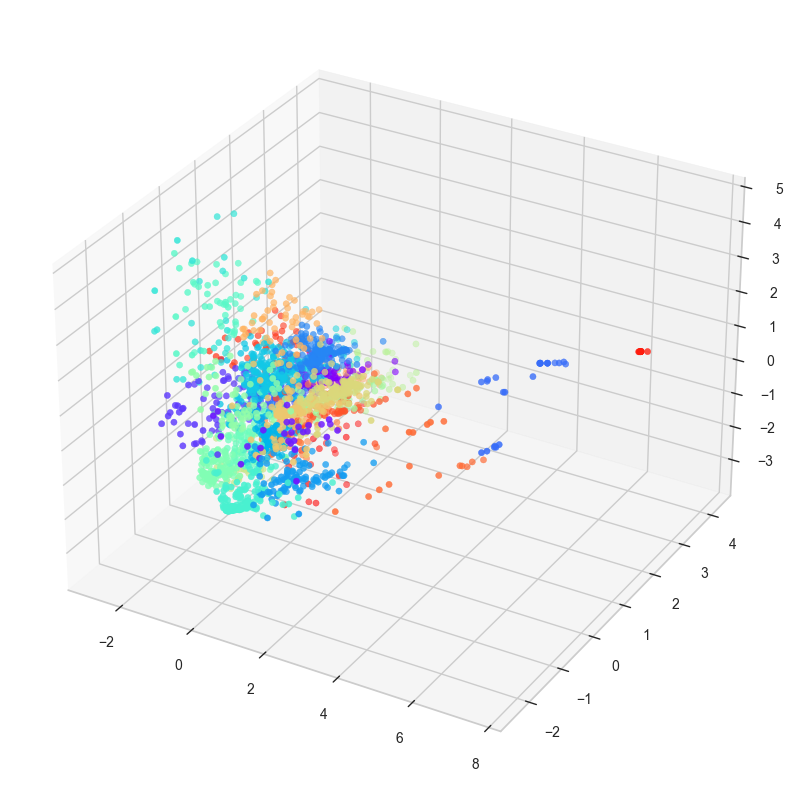

In [72]:
## make pca of 2 components and plot the clusters
pca = PCA(n_components=3)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)
## plot clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=clusters,cmap='rainbow')

#### DBSCAN

In [73]:
# Do DBSCAN on the data
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=14)
dbscan.fit_predict(scaled_df)

# Calculate the silhouette score
score = silhouette_score(scaled_df, dbscan.labels_)
labels = dbscan.labels_
print('Silhouetter Score: %.3f' % score)

# printno of clusters
print(f"Number of clusters: {len(set(dbscan.labels_))}")
n_clusters = 12

## calculate davis bouldin score and dunn index
print("Davis Bouldin",davies_bouldin_score(scaled_df, dbscan.labels_))



Silhouetter Score: -0.136
Number of clusters: 12
Davis Bouldin 1.4284068580903284


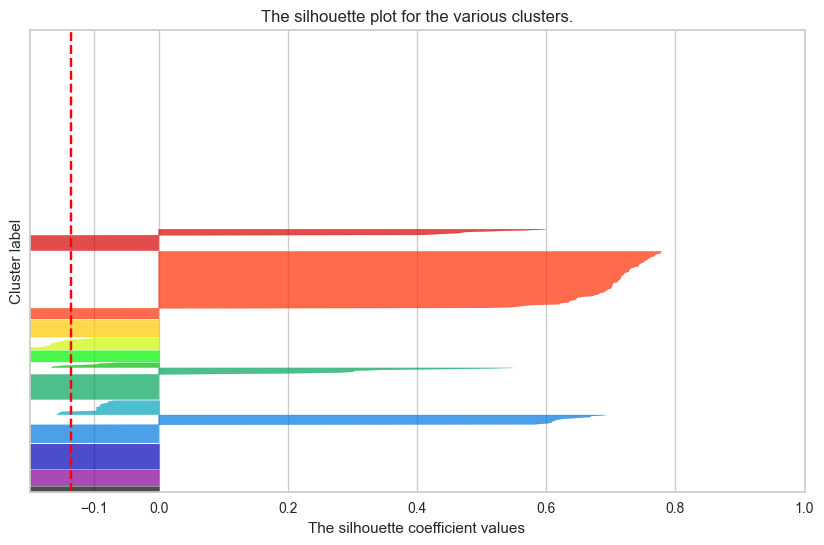

In [74]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

silhouette_avg = silhouette_score(scaled_df, labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_df, labels)
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot()

ax1.set_xlim([-0.2, 1])
# Set the y-axis limit to accommodate all samples
ax1.set_ylim([0, 500])

y_lower = 0
for i in range(n_clusters):

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Compute the new y_lower for next plot
    y_lower = y_upper  # Remove the additional spacing between clusters

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_yticks([])  # Clear the yaxis labels / ticks
# The vertical line for average silhouette score of all the values

plt.show()

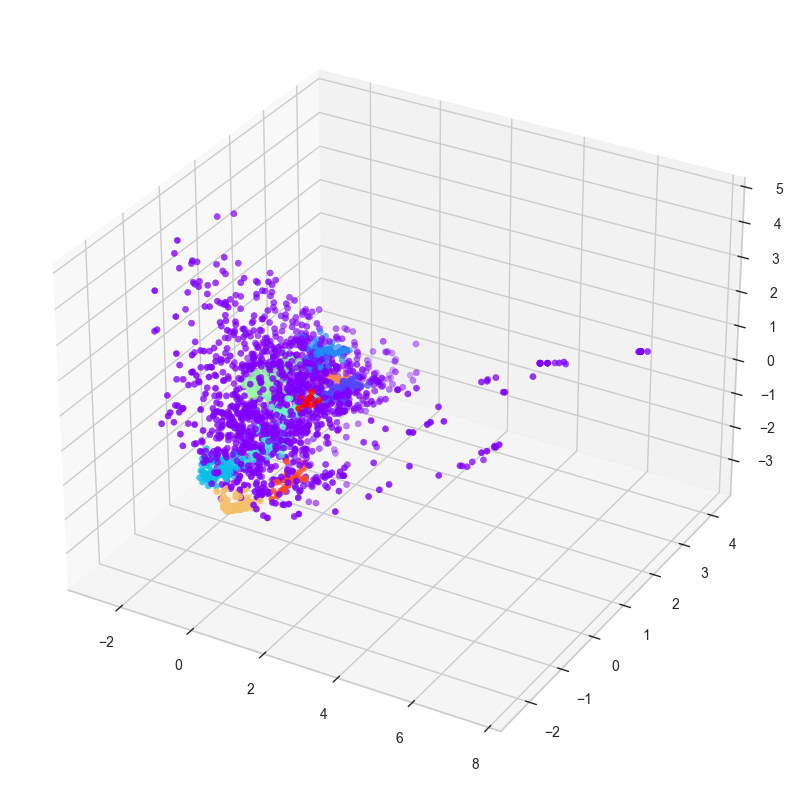

In [75]:
## make pca of 3 components and plot the clusters
pca = PCA(n_components=3)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)
## plot clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=dbscan.labels_,cmap='rainbow')


### Hierarchial Clustering

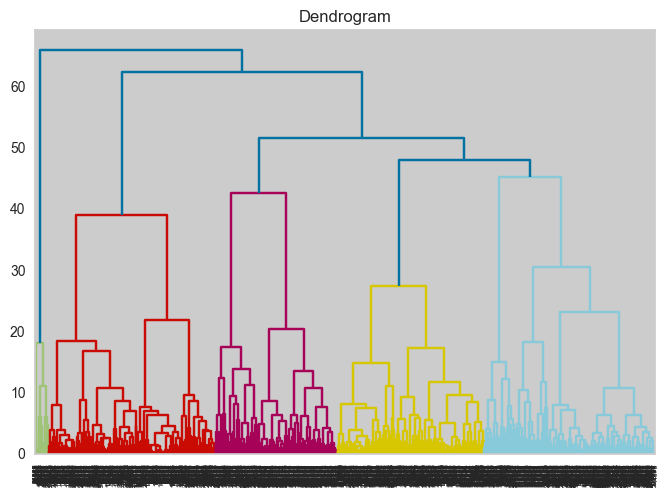

In [76]:
import scipy.cluster.hierarchy as sch

# Create the linkage matrix
linkage_matrix = sch.linkage(scaled_df, method='ward')

# Generate the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, labels=scaled_df.index)
plt.title('Dendrogram')
plt.show()

processing: i=10
processing: i=20
processing: i=30
processing: i=40
processing: i=50
processing: i=60
processing: i=70
processing: i=80
processing: i=90


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

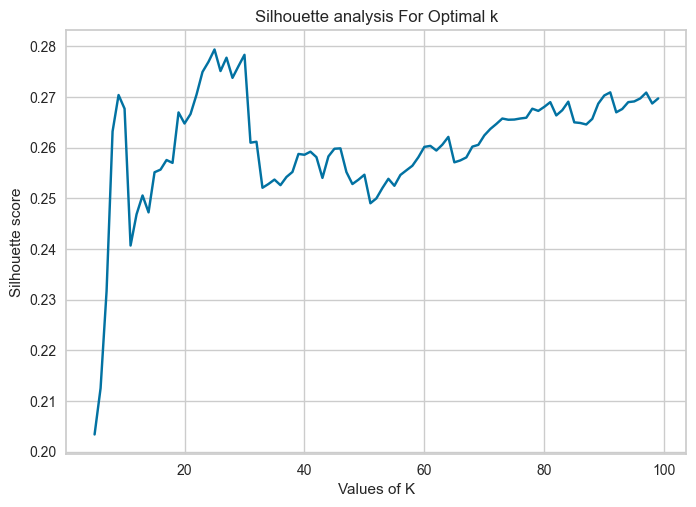

In [77]:
# Do Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

avg_silhouette = []

for i in range(5, 100):
    if(i % 10 == 0):
        print(f"processing: {i=}")
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(scaled_df)
    cluster_labels = agg.labels_
    avg_silhouette.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(range(5, 100),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [78]:
# get the index with the max value in avg_silhouette
max_index = avg_silhouette.index(max(avg_silhouette))
print(f"Max silhouette score: {max(avg_silhouette)}")
print(f"Optimal number of clusters: {max_index + 5}")

Max silhouette score: 0.2793684077200025
Optimal number of clusters: 25


In [79]:
agg = AgglomerativeClustering(n_clusters=25)
agg.fit(scaled_df)
labels = agg.labels_
n_clusters = 25

## print davis bouldin score
print("Davis Bouldin",davies_bouldin_score(scaled_df, agg.labels_))


Davis Bouldin 1.2377289238541125


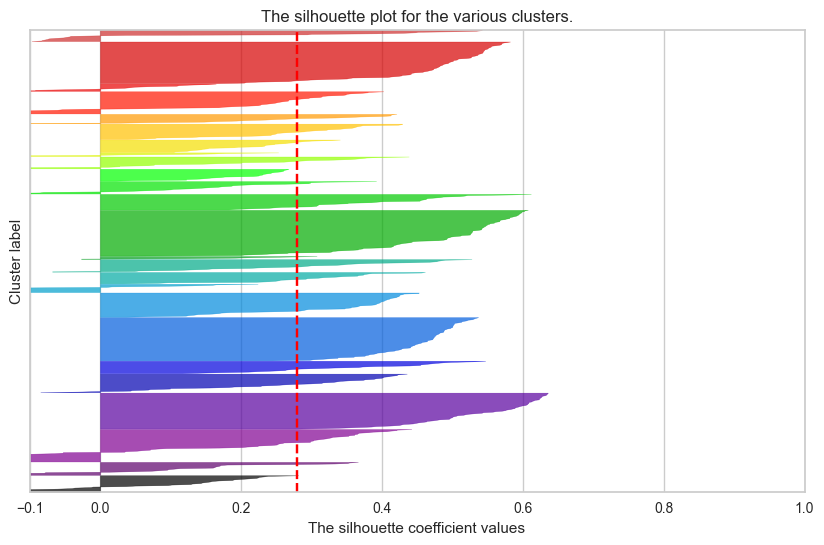

In [80]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

silhouette_avg = silhouette_score(scaled_df, labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_df, labels)
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot()

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# Set the y-axis limit to accommodate all samples
ax1.set_ylim([0, 900])

y_lower = 0
for i in range(n_clusters):

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Compute the new y_lower for next plot
    y_lower = y_upper  # Remove the additional spacing between clusters

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_yticks([])  # Clear the yaxis labels / ticks
# The vertical line for average silhouette score of all the values

plt.show()

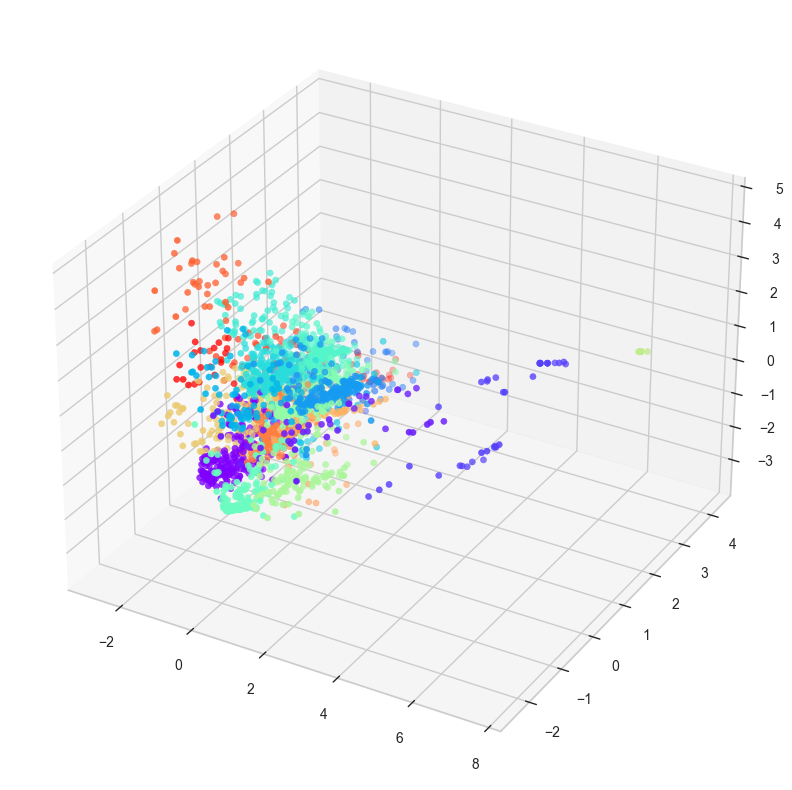

In [81]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)
## plot clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=agg.labels_,cmap='rainbow')